## 평수별 등록 차량 대수

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

In [3]:
train = pd.read_csv("parking_data/train.csv")
train.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0


In [6]:
# 단지코드, 면적에 따른 평균

# 모델링으로 예측할 것 
# 공사를 시작할 때 알 수 있는것
# 총 세대수, 임대건물구분, 지역, 전용면적, 나이(지역별로)

# 모르는것
#공가수, 임대보증금, 임대료, 전용면적별 세대수

# 구해야 되는 것 단지내 주차면수

#__________________________________#

# 추가 개선사항 
# 도별로 차이가 남 >> 시별로 도 차이가 날 것이다

train["임대건물구분"].value_counts()

아파트    2390
상가      562
Name: 임대건물구분, dtype: int64

In [5]:
train.isnull().sum()

단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              0
임대보증금                           569
임대료                             569
도보 10분거리 내 지하철역 수(환승노선 수 반영)    211
도보 10분거리 내 버스정류장 수                4
단지내주차면수                           0
등록차량수                             0
dtype: int64

In [2]:
pre_train = pd.read_csv("parking_data/pre_train.csv", index_col=[0])
pre_train.head()

,단지코드,총세대수,임대건물구분,지역,전용면적,전용면적별세대수,빈집,임대료,노선수,버스,주차면수,등록차량수
8,C2515,545,아파트,경상남도,33.48,276,17.0,82940,0.0,3.0,624.0,205.0
9,C2515,545,아파트,경상남도,39.60,60,17.0,107130,0.0,3.0,624.0,205.0
10,C2515,545,아파트,경상남도,39.60,20,17.0,107130,0.0,3.0,624.0,205.0
11,C2515,545,아파트,경상남도,46.90,38,17.0,149760,0.0,3.0,624.0,205.0
12,C2515,545,아파트,경상남도,46.90,19,17.0,149760,0.0,3.0,624.0,205.0


In [118]:
code_area = pre_train[["단지코드","전용면적"]]
mean_code_area = code_area.groupby("단지코드").mean()
mean_code_area.columns=["면적평균"]
max_code_area = code_area.groupby("단지코드").max()
max_code_area.columns=["면적최대"]
min_code_area = code_area.groupby("단지코드").min()
min_code_area.columns=["면적최소"]

area_check = pd.concat([mean_code_area,max_code_area, min_code_area], axis=1)

In [120]:
area_check["면적차이"]=area_check["면적최대"]-area_check["면적최소"]
area_check.head()

,면적평균,면적최대,면적최소,면적차이
단지코드,,,,
C1000,45.218571,51.93,39.57,12.36
C1004,39.136842,240.22,14.10,226.12
C1005,54.360000,59.64,51.49,8.15
C1013,46.142000,51.86,39.65,12.21
C1014,49.232857,59.73,33.35,26.38


In [128]:
area_check.sort_values(by="면적차이", ascending=False).head(50)

,면적평균,면적최대,면적최소,면적차이
단지코드,,,,
C2132,53.462766,583.40,15.00,568.40
C1616,69.338182,583.40,26.37,557.03
C1859,54.065250,583.40,26.37,557.03
C2310,65.699565,583.40,26.37,557.03
C2289,64.267083,583.40,26.37,557.03
C1439,42.334375,404.65,15.00,389.65
C1109,45.409545,401.50,21.85,379.65
C2416,63.779000,317.17,19.69,297.48
C2597,36.812188,248.56,15.00,233.56


In [38]:
area_train = pre_train.groupby(["단지코드","등록차량수","전용면적","총세대수","주차면수","노선수","버스"]).sum()
print(len(area_train))
area_train.head()

1835


전용면적별세대수    빈집
단지코드  등록차량수 전용면적  총세대수 주차면수  노선수 버스                 
C1000 481.0 39.57 566  438.0 0.0 1.0       344  20.0
            39.93 566  438.0 0.0 1.0        75  10.0
            46.70 566  438.0 0.0 1.0        36  10.0
            46.90 566  438.0 0.0 1.0        36  10.0
            51.93 566  438.0 0.0 1.0        75  20.0

In [41]:
area_train = area_train.reset_index(level=[1,2,3,4,5,6])
print(len(area_train))
area_train.head()

1835


,등록차량수,전용면적,총세대수,주차면수,노선수,버스,전용면적별세대수,빈집
단지코드,,,,,,,,
C1000,481.0,39.57,566,438.0,0.0,1.0,344,20.0
C1000,481.0,39.93,566,438.0,0.0,1.0,75,10.0
C1000,481.0,46.70,566,438.0,0.0,1.0,36,10.0
C1000,481.0,46.90,566,438.0,0.0,1.0,36,10.0
C1000,481.0,51.93,566,438.0,0.0,1.0,75,20.0


In [42]:
area_train.to_csv("parking_data/area_train.csv")

In [43]:
area_train.head(10)

,등록차량수,전용면적,총세대수,주차면수,노선수,버스,전용면적별세대수,빈집
단지코드,,,,,,,,
C1000,481.0,39.57,566,438.0,0.0,1.0,344,20.0
C1000,481.0,39.93,566,438.0,0.0,1.0,75,10.0
C1000,481.0,46.70,566,438.0,0.0,1.0,36,10.0
C1000,481.0,46.90,566,438.0,0.0,1.0,36,10.0
C1000,481.0,51.93,566,438.0,0.0,1.0,75,20.0
C1004,93.0,14.10,521,153.0,0.0,2.0,1,3.0
C1004,93.0,19.00,521,153.0,0.0,2.0,1,3.0
C1004,93.0,19.31,521,153.0,0.0,2.0,1,3.0
C1004,93.0,21.19,521,153.0,0.0,2.0,2,6.0


In [ ]:
# 등록차량수/총세대수 단지별 전용면적

- 단지별로 등록차량 수가 같아서 단지별 전용면적 평균을 구한 후 그 면적의 등록차량 수를 구했다.

In [24]:
pre_train[pre_train["단지코드"]=="C2515"]

,단지코드,총세대수,임대건물구분,지역,전용면적,전용면적별세대수,빈집,임대료,노선수,버스,주차면수,등록차량수
8,C2515,545,아파트,경상남도,33.48,276,17.0,82940,0.0,3.0,624.0,205.0
9,C2515,545,아파트,경상남도,39.60,60,17.0,107130,0.0,3.0,624.0,205.0
10,C2515,545,아파트,경상남도,39.60,20,17.0,107130,0.0,3.0,624.0,205.0
11,C2515,545,아파트,경상남도,46.90,38,17.0,149760,0.0,3.0,624.0,205.0
12,C2515,545,아파트,경상남도,46.90,19,17.0,149760,0.0,3.0,624.0,205.0
13,C2515,545,아파트,경상남도,51.97,106,17.0,190090,0.0,3.0,624.0,205.0
14,C2515,545,아파트,경상남도,51.97,26,17.0,190090,0.0,3.0,624.0,205.0


In [32]:
code_area=pre_train.groupby("단지코드").mean()["전용면적"]
code_area = pd.DataFrame(code_area)
code_area.columns=["단지별_면적평균"]
code_area.sort_values(by="단지별_면적평균")

,단지별_면적평균
단지코드,
C2059,23.156667
C2433,24.616000
C2437,24.830000
C1210,25.608000
C1565,25.625000
...,...
C2496,82.387500
C1636,82.442500
C1804,82.537500


In [44]:
area_parking = pd.merge(area_train, code_area, left_index=True, right_index=True)

In [45]:
area_parking.head()

,등록차량수,전용면적,총세대수,주차면수,노선수,버스,전용면적별세대수,빈집,단지별_면적평균
단지코드,,,,,,,,,
C1000,481.0,39.57,566,438.0,0.0,1.0,344,20.0,45.218571
C1000,481.0,39.93,566,438.0,0.0,1.0,75,10.0,45.218571
C1000,481.0,46.70,566,438.0,0.0,1.0,36,10.0,45.218571
C1000,481.0,46.90,566,438.0,0.0,1.0,36,10.0,45.218571
C1000,481.0,51.93,566,438.0,0.0,1.0,75,20.0,45.218571


In [56]:
target = area_parking[["등록차량수","단지별_면적평균"]]
target = target.reset_index()
target.head()

,단지코드,등록차량수,단지별_면적평균
0,C1000,481.0,45.218571
1,C1000,481.0,45.218571
2,C1000,481.0,45.218571
3,C1000,481.0,45.218571
4,C1000,481.0,45.218571


In [57]:
target = target.groupby("단지코드").mean()

In [58]:
target_graph = target.reset_index()
target_graph.head()

,단지코드,등록차량수,단지별_면적평균
0,C1000,481.0,45.218571
1,C1004,93.0,39.136842
2,C1005,376.0,54.360000
3,C1013,1665.0,46.142000
4,C1014,708.0,49.232857


In [62]:
target_graph.to_csv("parking_data/area_parking.csv", index=False)

In [18]:
area_parking = pd.read_csv("parking_data/area_parking.csv")
area_parking.head()

,단지코드,등록차량수,단지별_면적평균
0,C1000,481.0,45.218571
1,C1004,93.0,39.136842
2,C1005,376.0,54.360000
3,C1013,1665.0,46.142000
4,C1014,708.0,49.232857


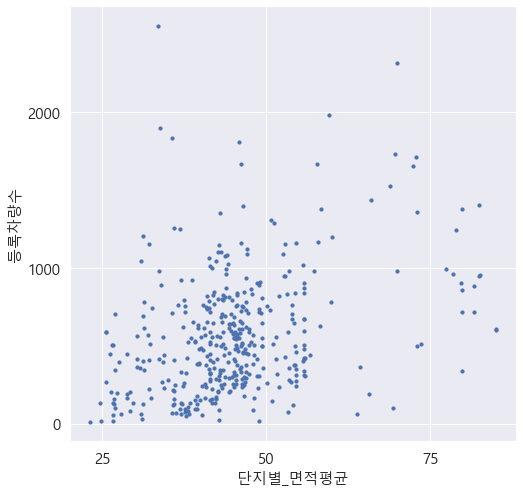

In [98]:
plt.figure(figsize=(8,8))
plt.scatter(area_parking["단지별_면적평균"],area_parking["등록차량수"], s=10)
plt.ylabel("등록차량수", fontsize=15)
plt.xlabel("단지별_면적평균", fontsize=15)
plt.yticks([0,1000,2000],fontsize=15)
plt.xticks(fontsize=15)
plt.grid(True)

In [93]:
correlation = area_parking.corr()
round(correlation.iloc[0,1],2)

0.35

C:\Users\gyeoa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


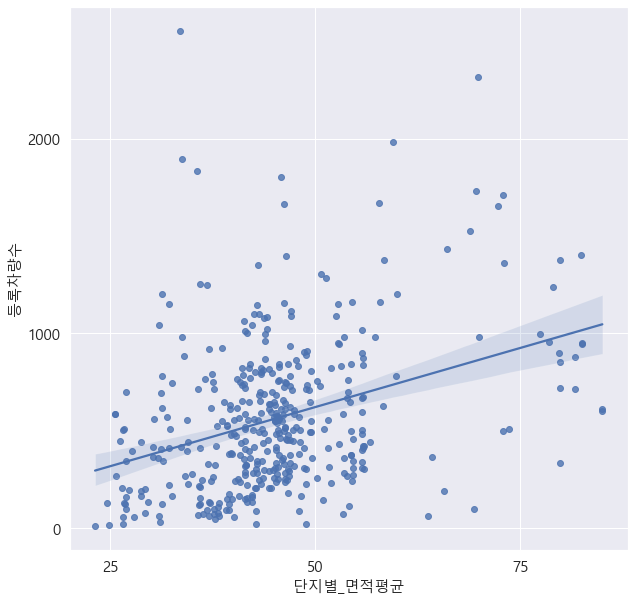

In [44]:
plt.figure(figsize=(10,10))
sns.regplot("단지별_면적평균","등록차량수", data=area_parking)
plt.ylabel("등록차량수", fontsize=15)
plt.xlabel("단지별_면적평균", fontsize=15)
plt.yticks([0,1000,2000],fontsize=15)
plt.xticks(fontsize=15)
plt.grid(True)

In [47]:
loc = pre_train[["단지코드","지역"]].drop_duplicates().set_index("단지코드")

In [54]:
loc_hue_graph = pd.merge(loc,area_parking, left_index=True, right_on="단지코드").set_index("단지코드")

In [97]:
loc_hue_graph.to_csv("parking_data/loc_area_car.csv")

C:\Users\gyeoa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


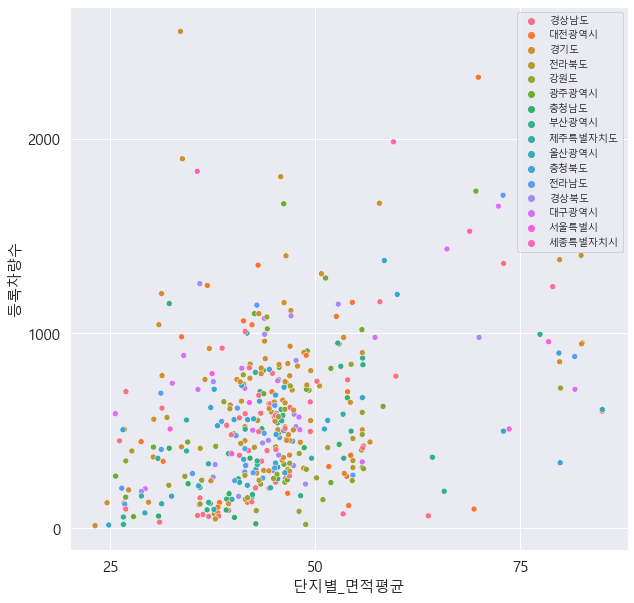

In [59]:
plt.figure(figsize=(10,10))
sns.scatterplot("단지별_면적평균","등록차량수", hue="지역", data=loc_hue_graph)
plt.ylabel("등록차량수", fontsize=15)
plt.xlabel("단지별_면적평균", fontsize=15)
plt.yticks([0,1000,2000],fontsize=15)
plt.xticks(fontsize=15)
plt.grid(True)
plt.legend(fontsize=10)

In [77]:
location = list(loc_hue_graph.value_counts("지역").index)
location

['경기도',
 '경상남도',
 '강원도',
 '충청북도',
 '대전광역시',
 '부산광역시',
 '광주광역시',
 '전라남도',
 '경상북도',
 '전라북도',
 '충청남도',
 '대구광역시',
 '제주특별자치도',
 '울산광역시',
 '서울특별시',
 '세종특별자치시']

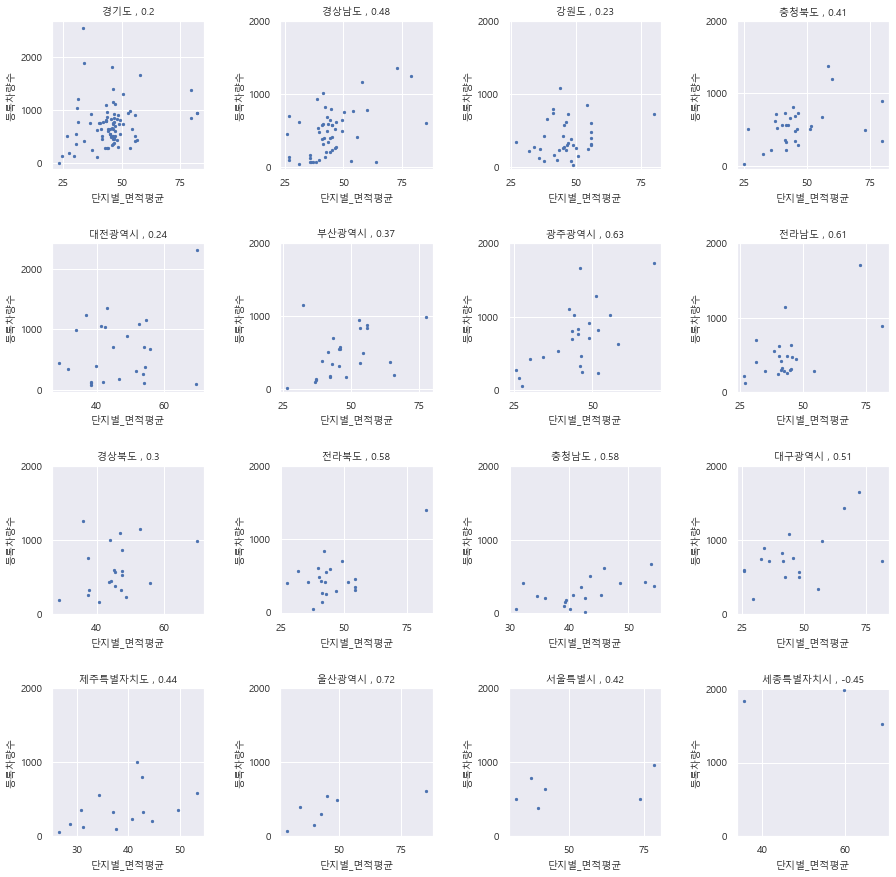

In [95]:
plt.figure(figsize=(15,15))
for loc in location:
        plt.subplot(4,4,location.index(loc)+1)
        target = loc_hue_graph[loc_hue_graph["지역"]==loc]       
        plt.scatter(target["단지별_면적평균"],target["등록차량수"], s=5)
        plt.ylabel("등록차량수", fontsize=10)
        plt.xlabel("단지별_면적평균", fontsize=10)
        plt.yticks([0,1000,2000],fontsize=10)
        plt.xticks(fontsize=10)
        plt.title(loc+" , "+str(round(target.corr().iloc[0,1],2)), fontsize=10)
        
plt.subplots_adjust(wspace=0.5, hspace=0.5)

- 세종특별자치시 : 데이터가 몇 개 없어 경향을 잘 파악할 수 없음
- 평수가 큰 단지가 모여있을 수록 등록 차량 수가 커지는 경향이 대부분에서 나타난다.

## 지역별 노인, 청소년 비율 데이터프레임

In [2]:
import pandas as pd
age_gender = pd.read_csv("parking_data/age_gender_info.csv")
age_gender.head()

,지역,10대미만(여자),10대미만(남자),10대(여자),10대(남자),20대(여자),20대(남자),30대(여자),30대(남자),40대(여자),...,60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자)
0,경상북도,0.030158,0.033195,0.056346,0.061360,0.060096,0.067859,0.053433,0.049572,0.083660,...,0.082684,0.063889,0.047717,0.030172,0.029361,0.011211,0.005578,0.001553,0.000234,0.000014
1,경상남도,0.027400,0.026902,0.053257,0.055568,0.064920,0.070618,0.056414,0.057550,0.077092,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010
2,대전광역시,0.028197,0.029092,0.040490,0.042793,0.060834,0.064247,0.068654,0.066848,0.074667,...,0.088468,0.070261,0.051010,0.037143,0.032455,0.013751,0.006494,0.001740,0.000298,0.000066
3,경기도,0.038030,0.039507,0.052546,0.053990,0.058484,0.059894,0.072331,0.068704,0.083208,...,0.074237,0.058419,0.042422,0.032725,0.025136,0.012354,0.005390,0.001707,0.000290,0.000067
4,전라북도,0.028089,0.029065,0.059685,0.060080,0.066262,0.070322,0.052027,0.046596,0.077005,...,0.076636,0.068042,0.051025,0.035748,0.035049,0.012641,0.007223,0.001898,0.000158,0.000013


In [9]:
youth = age_gender[age_gender.columns[1:5]]
old = age_gender[age_gender.columns[-8:]]

youth["청소년"] = youth.sum(axis=1)
old["노인"] = old.sum(axis=1)

display(youth.head())
display(old.head())

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_37120\735482798.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  youth["청소년"] = youth.sum(axis=1)
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_37120\735482798.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  old["노인"] = old.sum(axis=1)


,10대미만(여자),10대미만(남자),10대(여자),10대(남자),청소년
0,0.030158,0.033195,0.056346,0.061360,0.181059
1,0.027400,0.026902,0.053257,0.055568,0.163127
2,0.028197,0.029092,0.040490,0.042793,0.140571
3,0.038030,0.039507,0.052546,0.053990,0.184072
4,0.028089,0.029065,0.059685,0.060080,0.176920


,70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자),노인
0,0.047717,0.030172,0.029361,0.011211,0.005578,0.001553,0.000234,0.000014,0.125840
1,0.048357,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010,0.126474
2,0.051010,0.037143,0.032455,0.013751,0.006494,0.001740,0.000298,0.000066,0.142957
3,0.042422,0.032725,0.025136,0.012354,0.005390,0.001707,0.000290,0.000067,0.120093
4,0.051025,0.035748,0.035049,0.012641,0.007223,0.001898,0.000158,0.000013,0.143755


In [11]:
loc_youth_old = pd.DataFrame({"지역":age_gender["지역"], "청소년":youth["청소년"], "노인":old["노인"]})
loc_youth_old.head()

,지역,청소년,노인
0,경상북도,0.181059,0.125840
1,경상남도,0.163127,0.126474
2,대전광역시,0.140571,0.142957
3,경기도,0.184072,0.120093
4,전라북도,0.176920,0.143755


In [12]:
loc_youth_old["청소년+노인"] = loc_youth_old["청소년"]+loc_youth_old["노인"]
loc_youth_old.head()

,지역,청소년,노인,청소년+노인
0,경상북도,0.181059,0.125840,0.306899
1,경상남도,0.163127,0.126474,0.289602
2,대전광역시,0.140571,0.142957,0.283527
3,경기도,0.184072,0.120093,0.304165
4,전라북도,0.176920,0.143755,0.320675


In [13]:
loc_youth_old.to_csv("parking_data/지역별_청소년_노인인구비율.csv", index=False)

## 전용면적 category로 나눈 후 세대 수로 value채우기(단지별로 data 1개씩)
- 100이상은 100으로 놓고 나머지는 10단위로 10개 
- area10~100(area10 : 10m2대의 집)

In [17]:
pre_train = pd.read_csv("parking_data/pre_train.csv", index_col=[0])
pre_train.head()

,단지코드,총세대수,임대건물구분,지역,전용면적,전용면적별세대수,빈집,임대료,노선수,버스,주차면수,등록차량수
8,C2515,545,아파트,경상남도,33.48,276,17.0,82940,0.0,3.0,624.0,205.0
9,C2515,545,아파트,경상남도,39.60,60,17.0,107130,0.0,3.0,624.0,205.0
10,C2515,545,아파트,경상남도,39.60,20,17.0,107130,0.0,3.0,624.0,205.0
11,C2515,545,아파트,경상남도,46.90,38,17.0,149760,0.0,3.0,624.0,205.0
12,C2515,545,아파트,경상남도,46.90,19,17.0,149760,0.0,3.0,624.0,205.0


In [18]:
pre_train["전용면적"].describe()

count    2869.000000
mean       44.421394
std        32.072217
min        12.620000
25%        32.100000
50%        39.840000
75%        51.050000
max       583.400000
Name: 전용면적, dtype: float64

In [19]:
pre_train.columns

Index(['단지코드', '총세대수', '임대건물구분', '지역', '전용면적', '전용면적별세대수', '빈집', '임대료', '노선수',
       '버스', '주차면수', '등록차량수'],
      dtype='object')

In [21]:
pre_train2 = pre_train[['단지코드', '총세대수', '임대건물구분', '지역', '전용면적', '전용면적별세대수', '빈집', '임대료', '주차면수', '등록차량수','노선수','버스']]
pre_train2.head()

,단지코드,총세대수,임대건물구분,지역,전용면적,전용면적별세대수,빈집,임대료,주차면수,등록차량수,노선수,버스
8,C2515,545,아파트,경상남도,33.48,276,17.0,82940,624.0,205.0,0.0,3.0
9,C2515,545,아파트,경상남도,39.60,60,17.0,107130,624.0,205.0,0.0,3.0
10,C2515,545,아파트,경상남도,39.60,20,17.0,107130,624.0,205.0,0.0,3.0
11,C2515,545,아파트,경상남도,46.90,38,17.0,149760,624.0,205.0,0.0,3.0
12,C2515,545,아파트,경상남도,46.90,19,17.0,149760,624.0,205.0,0.0,3.0


<AxesSubplot:xlabel='전용면적별세대수'>

C:\Users\gyeoa\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gyeoa\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gyeoa\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47732 (\N{HANGUL SYLLABLE MYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gyeoa\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gyeoa\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gyeoa\ana

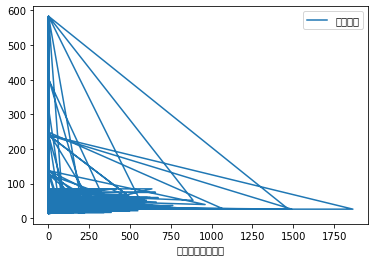

In [26]:
target = pre_train[["전용면적","전용면적별세대수"]]


In [31]:
category = pre_train.copy()
category.head()

,단지코드,총세대수,임대건물구분,지역,전용면적,전용면적별세대수,빈집,임대료,노선수,버스,주차면수,등록차량수
8,C2515,545,아파트,경상남도,33.48,276,17.0,82940,0.0,3.0,624.0,205.0
9,C2515,545,아파트,경상남도,39.60,60,17.0,107130,0.0,3.0,624.0,205.0
10,C2515,545,아파트,경상남도,39.60,20,17.0,107130,0.0,3.0,624.0,205.0
11,C2515,545,아파트,경상남도,46.90,38,17.0,149760,0.0,3.0,624.0,205.0
12,C2515,545,아파트,경상남도,46.90,19,17.0,149760,0.0,3.0,624.0,205.0


In [34]:
list(pre_train.index)

[8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 1

In [35]:
category["range"] = 0
category.head()

,단지코드,총세대수,임대건물구분,지역,전용면적,전용면적별세대수,빈집,임대료,노선수,버스,주차면수,등록차량수,range
8,C2515,545,아파트,경상남도,33.48,276,17.0,82940,0.0,3.0,624.0,205.0,0
9,C2515,545,아파트,경상남도,39.60,60,17.0,107130,0.0,3.0,624.0,205.0,0
10,C2515,545,아파트,경상남도,39.60,20,17.0,107130,0.0,3.0,624.0,205.0,0
11,C2515,545,아파트,경상남도,46.90,38,17.0,149760,0.0,3.0,624.0,205.0,0
12,C2515,545,아파트,경상남도,46.90,19,17.0,149760,0.0,3.0,624.0,205.0,0


In [36]:
for i in list(pre_train.index):
    if pre_train["전용면적"][i]<=20:
        category["range"][i]=10
    elif pre_train["전용면적"][i]<=30:
        category["range"][i] = 20
    elif pre_train["전용면적"][i]<=40:
        category["range"][i] = 30
    elif pre_train["전용면적"][i]<=50:
        category["range"][i]=40
    elif pre_train["전용면적"][i]<=60:
        category["range"][i] = 50
    elif pre_train["전용면적"][i]<=70:
        category["range"][i] = 60
    elif pre_train["전용면적"][i]<=80:
        category["range"][i] = 70
    elif pre_train["전용면적"][i]<=90:
        category["range"][i] = 80
    elif pre_train["전용면적"][i]<=100:
        category["range"][i] = 90
    else:
        category["range"][i]=100
        
category.head()

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_37120\2577657773.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category["range"][i] = 30
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_37120\2577657773.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category["range"][i]=40
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_37120\2577657773.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category["range"][i] = 50
C:\Users\gyeoa\AppData\

,단지코드,총세대수,임대건물구분,지역,전용면적,전용면적별세대수,빈집,임대료,노선수,버스,주차면수,등록차량수,range
8,C2515,545,아파트,경상남도,33.48,276,17.0,82940,0.0,3.0,624.0,205.0,30
9,C2515,545,아파트,경상남도,39.60,60,17.0,107130,0.0,3.0,624.0,205.0,30
10,C2515,545,아파트,경상남도,39.60,20,17.0,107130,0.0,3.0,624.0,205.0,30
11,C2515,545,아파트,경상남도,46.90,38,17.0,149760,0.0,3.0,624.0,205.0,40
12,C2515,545,아파트,경상남도,46.90,19,17.0,149760,0.0,3.0,624.0,205.0,40


In [38]:
category.to_csv("parking_data/category1.csv")
pd.read_csv("parking_data/category1.csv", index_col=[0]).head()

,단지코드,총세대수,임대건물구분,지역,전용면적,전용면적별세대수,빈집,임대료,노선수,버스,주차면수,등록차량수,range
8,C2515,545,아파트,경상남도,33.48,276,17.0,82940,0.0,3.0,624.0,205.0,30
9,C2515,545,아파트,경상남도,39.60,60,17.0,107130,0.0,3.0,624.0,205.0,30
10,C2515,545,아파트,경상남도,39.60,20,17.0,107130,0.0,3.0,624.0,205.0,30
11,C2515,545,아파트,경상남도,46.90,38,17.0,149760,0.0,3.0,624.0,205.0,40
12,C2515,545,아파트,경상남도,46.90,19,17.0,149760,0.0,3.0,624.0,205.0,40


In [18]:
area_category = pd.read_csv("parking_data/category1.csv", index_col=[0])
area_category.head()

,단지코드,총세대수,임대건물구분,지역,전용면적,전용면적별세대수,빈집,임대료,노선수,버스,주차면수,등록차량수,range
8,C2515,545,아파트,경상남도,33.48,276,17.0,82940,0.0,3.0,624.0,205.0,30
9,C2515,545,아파트,경상남도,39.60,60,17.0,107130,0.0,3.0,624.0,205.0,30
10,C2515,545,아파트,경상남도,39.60,20,17.0,107130,0.0,3.0,624.0,205.0,30
11,C2515,545,아파트,경상남도,46.90,38,17.0,149760,0.0,3.0,624.0,205.0,40
12,C2515,545,아파트,경상남도,46.90,19,17.0,149760,0.0,3.0,624.0,205.0,40


In [20]:
area_category[area_category["range"]=="90"]

,단지코드,총세대수,임대건물구분,지역,전용면적,전용면적별세대수,빈집,임대료,노선수,버스,주차면수,등록차량수,range


In [8]:
area_target = area_category[["단지코드","전용면적","전용면적별세대수","range"]]

In [19]:
code = list(area_target["단지코드"].unique())
len(code)

411

In [34]:
range_list = sorted(list(area_target["range"].unique()))

In [35]:
range_columns = []
for i in range_list:
    range_columns.append("area"+str(i))
    
range_columns

['area10',
 'area20',
 'area30',
 'area40',
 'area50',
 'area60',
 'area70',
 'area80',
 'area100']

In [36]:
for column in range_columns:
    area_target[column]=0
    
area_target.head()

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_28100\1833521314.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_target[column]=0
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_28100\1833521314.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_target[column]=0
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_28100\1833521314.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

,단지코드,전용면적,전용면적별세대수,range,area10,area20,area30,area40,area50,area60,area70,area80,area100
8,C2515,33.48,276,30,0,0,0,0,0,0,0,0,0
9,C2515,39.60,60,30,0,0,0,0,0,0,0,0,0
10,C2515,39.60,20,30,0,0,0,0,0,0,0,0,0
11,C2515,46.90,38,40,0,0,0,0,0,0,0,0,0
12,C2515,46.90,19,40,0,0,0,0,0,0,0,0,0


In [59]:
area_value = area_target.copy()
area_value.head()

,단지코드,전용면적,전용면적별세대수,range,area10,area20,area30,area40,area50,area60,area70,area80,area100
8,C2515,33.48,276,30,0,0,0,0,0,0,0,0,0
9,C2515,39.60,60,30,0,0,0,0,0,0,0,0,0
10,C2515,39.60,20,30,0,0,0,0,0,0,0,0,0
11,C2515,46.90,38,40,0,0,0,0,0,0,0,0,0
12,C2515,46.90,19,40,0,0,0,0,0,0,0,0,0


In [38]:
target_columns = area_value.columns[4:]

Index(['area10', 'area20', 'area30', 'area40', 'area50', 'area60', 'area70',
       'area80', 'area100'],
      dtype='object')

In [44]:
target1 = area_value[area_value["단지코드"]=="C2515"].groupby("range").sum()["전용면적별세대수"]
print(target1.index[0], target1.values[0])

30 356


In [60]:
area_value = area_value.drop_duplicates("단지코드")

In [61]:
area_value = area_value.reset_index(drop=True)

In [62]:
area_value.head()

,단지코드,전용면적,전용면적별세대수,range,area10,area20,area30,area40,area50,area60,area70,area80,area100
0,C2515,33.48,276,30,0,0,0,0,0,0,0,0,0
1,C1407,30.95,288,30,0,0,0,0,0,0,0,0,0
2,C1945,39.72,120,30,0,0,0,0,0,0,0,0,0
3,C1470,36.55,228,30,0,0,0,0,0,0,0,0,0
4,C1898,36.55,230,30,0,0,0,0,0,0,0,0,0


In [63]:
for co in code:
    target = area_target[area_target["단지코드"]==co].groupby("range").sum()["전용면적별세대수"]
    area_value_index = area_value[area_value["단지코드"]==co].index[0]
    for i in range(len(target)):
        index1 = "area"+str(target.index[i])
        value = target.values[i]
        area_value[index1][area_value_index] = value
            
area_value.head()

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_28100\2927925269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_value[index1][area_value_index] = value
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_28100\2927925269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_value[index1][area_value_index] = value
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_28100\2927925269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_value

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_28100\2927925269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_value[index1][area_value_index] = value
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_28100\2927925269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_value[index1][area_value_index] = value
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_28100\2927925269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_value

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_28100\2927925269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_value[index1][area_value_index] = value
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_28100\2927925269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_value[index1][area_value_index] = value
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_28100\2927925269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_value

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_28100\2927925269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_value[index1][area_value_index] = value
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_28100\2927925269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_value[index1][area_value_index] = value
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_28100\2927925269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_value

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_28100\2927925269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_value[index1][area_value_index] = value
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_28100\2927925269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_value[index1][area_value_index] = value
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_28100\2927925269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_value

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_28100\2927925269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_value[index1][area_value_index] = value
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_28100\2927925269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_value[index1][area_value_index] = value
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_28100\2927925269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_value

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_28100\2927925269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_value[index1][area_value_index] = value
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_28100\2927925269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_value[index1][area_value_index] = value
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_28100\2927925269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_value

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_28100\2927925269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_value[index1][area_value_index] = value
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_28100\2927925269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_value[index1][area_value_index] = value
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_28100\2927925269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_value

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_28100\2927925269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_value[index1][area_value_index] = value
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_28100\2927925269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_value[index1][area_value_index] = value
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_28100\2927925269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_value

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_28100\2927925269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_value[index1][area_value_index] = value
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_28100\2927925269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_value[index1][area_value_index] = value
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_28100\2927925269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_value

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_28100\2927925269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_value[index1][area_value_index] = value
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_28100\2927925269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_value[index1][area_value_index] = value
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_28100\2927925269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_value

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_28100\2927925269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_value[index1][area_value_index] = value
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_28100\2927925269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_value[index1][area_value_index] = value
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_28100\2927925269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_value

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_28100\2927925269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_value[index1][area_value_index] = value
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_28100\2927925269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_value[index1][area_value_index] = value
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_28100\2927925269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_value

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_28100\2927925269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_value[index1][area_value_index] = value
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_28100\2927925269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_value[index1][area_value_index] = value
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_28100\2927925269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_value

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_28100\2927925269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_value[index1][area_value_index] = value
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_28100\2927925269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_value[index1][area_value_index] = value
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_28100\2927925269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_value

,단지코드,전용면적,전용면적별세대수,range,area10,area20,area30,area40,area50,area60,area70,area80,area100
0,C2515,33.48,276,30,0,0,356,57,132,0,0,0,0
1,C1407,30.95,288,30,0,0,390,702,124,0,0,0,0
2,C1945,39.72,120,30,0,0,240,0,515,0,0,0,0
3,C1470,36.55,228,30,0,0,254,196,246,0,0,0,0
4,C1898,36.55,230,30,0,0,271,209,86,0,0,0,0


In [68]:
area_category_final = area_category.drop_duplicates("단지코드")
area_category_final

,단지코드,총세대수,임대건물구분,지역,전용면적,전용면적별세대수,빈집,임대료,노선수,버스,주차면수,등록차량수,range
8,C2515,545,아파트,경상남도,33.48,276,17.0,82940,0.0,3.0,624.0,205.0,30
15,C1407,1216,아파트,대전광역시,30.95,288,13.0,127350,1.0,1.0,1285.0,1064.0,30
26,C1945,755,아파트,경기도,39.72,120,6.0,130070,1.0,3.0,734.0,730.0,30
32,C1470,696,아파트,전라북도,36.55,228,14.0,102130,0.0,2.0,645.0,553.0,30
36,C1898,566,아파트,전라북도,36.55,230,9.0,102130,0.0,6.0,517.0,415.0,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2932,C2586,90,아파트,제주특별자치도,16.64,12,7.0,71400,0.0,3.0,66.0,57.0,10
2937,C2035,492,아파트,강원도,29.53,132,24.0,117000,0.0,1.0,521.0,246.0,20
2942,C2020,40,아파트,부산광역시,16.80,20,7.0,87000,1.0,2.0,25.0,19.0,10
2945,C2437,90,아파트,충청북도,24.83,90,12.0,107530,0.0,1.0,30.0,16.0,20


In [74]:
area_merge = area_value[['단지코드', 'area10', 'area20', 'area30', 'area40', 'area50', 'area60', 'area70', 'area80', 'area100']]
area_merge.head()

,단지코드,area10,area20,area30,area40,area50,area60,area70,area80,area100
0,C2515,0,0,356,57,132,0,0,0,0
1,C1407,0,0,390,702,124,0,0,0,0
2,C1945,0,0,240,0,515,0,0,0,0
3,C1470,0,0,254,196,246,0,0,0,0
4,C1898,0,0,271,209,86,0,0,0,0


In [76]:
area_final = pd.merge(area_category_final, area_merge, on="단지코드")

In [79]:
area_final = area_final[['단지코드', '총세대수', '임대건물구분', '지역', '빈집', '노선수',
       '버스', 'area10', 'area20', 'area30', 'area40','area50', 'area60', 'area70', 'area80', 'area100', '주차면수', '등록차량수']]

In [80]:
area_final.to_csv("parking_data/면적별_세대수_구분.csv", index=False)

In [84]:
area_final.head()

,단지코드,총세대수,임대건물구분,지역,빈집,노선수,버스,area10,area20,area30,area40,area50,area60,area70,area80,area100,주차면수,등록차량수
0,C2515,545,아파트,경상남도,17.0,0.0,3.0,0,0,356,57,132,0,0,0,0,624.0,205.0
1,C1407,1216,아파트,대전광역시,13.0,1.0,1.0,0,0,390,702,124,0,0,0,0,1285.0,1064.0
2,C1945,755,아파트,경기도,6.0,1.0,3.0,0,0,240,0,515,0,0,0,0,734.0,730.0
3,C1470,696,아파트,전라북도,14.0,0.0,2.0,0,0,254,196,246,0,0,0,0,645.0,553.0
4,C1898,566,아파트,전라북도,9.0,0.0,6.0,0,0,271,209,86,0,0,0,0,517.0,415.0


## 주어진 데이터 정말 간단하게 분석

In [5]:
gubun = pd.read_csv("parking_data/면적별_세대수_구분.csv")
gubun.head()

,단지코드,총세대수,임대건물구분,지역,빈집,노선수,버스,area10,area20,area30,area40,area50,area60,area70,area80,area100,주차면수,등록차량수
0,C2515,545,아파트,경상남도,17.0,0.0,3.0,0,0,356,57,132,0,0,0,0,624.0,205.0
1,C1407,1216,아파트,대전광역시,13.0,1.0,1.0,0,0,390,702,124,0,0,0,0,1285.0,1064.0
2,C1945,755,아파트,경기도,6.0,1.0,3.0,0,0,240,0,515,0,0,0,0,734.0,730.0
3,C1470,696,아파트,전라북도,14.0,0.0,2.0,0,0,254,196,246,0,0,0,0,645.0,553.0
4,C1898,566,아파트,전라북도,9.0,0.0,6.0,0,0,271,209,86,0,0,0,0,517.0,415.0


In [6]:
lack_over = gubun.copy()
lack_over["등록차량수에 대한 주차면수"] = lack_over["주차면수"]/lack_over["등록차량수"]
lack_over.head()

,단지코드,총세대수,임대건물구분,지역,빈집,노선수,버스,area10,area20,area30,area40,area50,area60,area70,area80,area100,주차면수,등록차량수,등록차량수에 대한 주차면수
0,C2515,545,아파트,경상남도,17.0,0.0,3.0,0,0,356,57,132,0,0,0,0,624.0,205.0,3.043902
1,C1407,1216,아파트,대전광역시,13.0,1.0,1.0,0,0,390,702,124,0,0,0,0,1285.0,1064.0,1.207707
2,C1945,755,아파트,경기도,6.0,1.0,3.0,0,0,240,0,515,0,0,0,0,734.0,730.0,1.005479
3,C1470,696,아파트,전라북도,14.0,0.0,2.0,0,0,254,196,246,0,0,0,0,645.0,553.0,1.166365
4,C1898,566,아파트,전라북도,9.0,0.0,6.0,0,0,271,209,86,0,0,0,0,517.0,415.0,1.245783


Text(0.5, 1.0, '주차면수가 부족한 곳과 많은 곳')

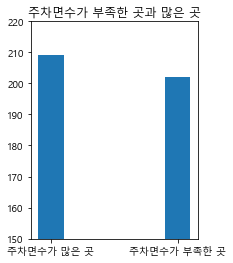

In [31]:
over = lack_over[lack_over["등록차량수에 대한 주차면수"]>=1]
lack = lack_over[lack_over["등록차량수에 대한 주차면수"]<1]

x = ["주차면수가 많은 곳", "주차면수가 부족한 곳"]
y = [len(over), len(lack)]

plt.figure(figsize=(3,4))
plt.bar(x, y, width=0.2)
plt.ylim(150,220)
plt.title("주차면수가 부족한 곳과 많은 곳")

In [ ]:
# 지역별로 주차면수가 많은 곳, 주차면수가 부족한 곳


Text(0.5, 1.0, '평수별 세대수')

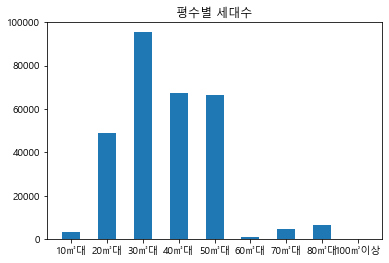

In [30]:
# 평수 별로 세대가 총 몇 개가 있는지

area = gubun.copy()
area_count = area[area.columns[7:16]].sum()
#area_count.plot(kind="bar")
x = ["10㎡대","20㎡대","30㎡대","40㎡대","50㎡대","60㎡대","70㎡대","80㎡대","100㎡이상"]
y = list(area_count.values)
plt.bar(x, y, width=0.5)
plt.title("평수별 세대수")

In [37]:
### 지역별 등록차량수, 주차면수, 대중교통 수 평균

mean_cnt_loc = gubun.groupby("지역").mean()
mean_cnt_loc = mean_cnt_loc[["주차면수", "등록차량수","노선수","버스"]]
mean_cnt_loc = round(mean_cnt_loc, 2)
mean_cnt_loc

,주차면수,등록차량수,노선수,버스
지역,,,,
강원도,364.54,385.08,0.00,3.03
경기도,723.49,721.52,0.20,4.50
경상남도,521.55,470.45,0.00,4.08
경상북도,556.52,595.76,0.00,3.29
광주광역시,623.96,713.04,0.00,3.83
대구광역시,721.50,765.94,0.44,3.78
대전광역시,745.28,647.04,0.40,4.72
부산광역시,629.24,474.12,0.60,2.96
서울특별시,613.50,632.50,0.17,4.00


In [39]:
parking_mean_cnt_loc = mean_cnt_loc[mean_cnt_loc.columns[:2]]
transport_mean_cnt_loc = mean_cnt_loc[mean_cnt_loc.columns[2:]]
display(parking_mean_cnt_loc.head())
display(transport_mean_cnt_loc.head())

,주차면수,등록차량수
지역,,
강원도,364.54,385.08
경기도,723.49,721.52
경상남도,521.55,470.45
경상북도,556.52,595.76
광주광역시,623.96,713.04


,노선수,버스
지역,,
강원도,0.0,3.03
경기도,0.2,4.50
경상남도,0.0,4.08
경상북도,0.0,3.29
광주광역시,0.0,3.83


In [50]:
parking_mean_cnt_loc = parking_mean_cnt_loc.sort_values(by="주차면수")

Text(0.5, 1.0, '지역별 주차면수와 등록차량수 평균')

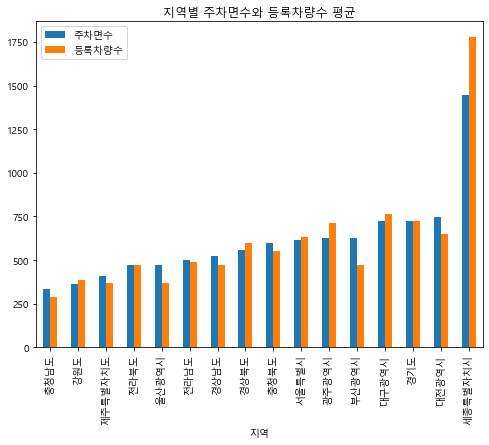

In [51]:
parking_mean_cnt_loc.plot(kind="bar", width=0.5, figsize=(8,6))
plt.title("지역별 주차면수와 등록차량수 평균")

In [65]:
list = []
for i in range(len(parking_mean_cnt_loc)):
    if parking_mean_cnt_loc["주차면수"][i] > parking_mean_cnt_loc["등록차량수"][i]:
        list.append("충분")
    else:
        list.append("부족")
        
parking_mean_cnt_loc["부족한 곳, 많은 곳"] = list
parking_mean_cnt_loc

,주차면수,등록차량수,"부족한 곳, 많은 곳"
지역,,,
충청남도,332.84,288.53,충분
강원도,364.54,385.08,부족
제주특별자치도,410.43,371.43,충분
전라북도,470.10,474.10,부족
울산광역시,473.29,367.00,충분
전라남도,499.88,491.17,충분
경상남도,521.55,470.45,충분
경상북도,556.52,595.76,부족
충청북도,596.33,552.53,충분


Text(0.5, 1.0, '지역별 주차면수와 등록차량수 평균')

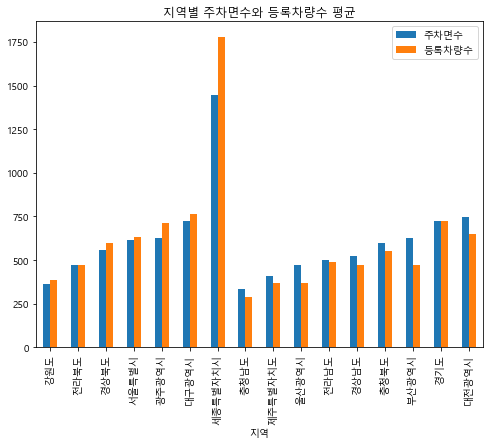

In [69]:
parking_mean_cnt_loc = parking_mean_cnt_loc.sort_values(by="부족한 곳, 많은 곳")
parking_mean_cnt_loc.plot(kind="bar", width=0.5, figsize=(8,6))
plt.title("지역별 주차면수와 등록차량수 평균")

In [70]:
parking_mean_cnt_loc
7/16*100

43.75

In [53]:
mean_cnt_loc = gubun.groupby("지역").mean()
mean_cnt_loc = mean_cnt_loc[["주차면수", "등록차량수","노선수","버스"]]
transport_mean_cnt_loc = mean_cnt_loc[mean_cnt_loc.columns[2:]]
transport_mean_cnt_loc["가까운 대중교통 수"] = transport_mean_cnt_loc["노선수"]+transport_mean_cnt_loc["버스"]
transport_mean_cnt_loc

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_9296\439892966.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transport_mean_cnt_loc["가까운 대중교통 수"] = transport_mean_cnt_loc["노선수"]+transport_mean_cnt_loc["버스"]


,노선수,버스,가까운 대중교통 수
지역,,,
강원도,0.000000,3.027027,3.027027
경기도,0.202381,4.500000,4.702381
경상남도,0.000000,4.075472,4.075472
경상북도,0.000000,3.285714,3.285714
광주광역시,0.000000,3.833333,3.833333
대구광역시,0.444444,3.777778,4.222222
대전광역시,0.400000,4.720000,5.120000
부산광역시,0.600000,2.960000,3.560000
서울특별시,0.166667,4.000000,4.166667


Text(0.5, 1.0, '지역별 가까운 대중교통 수 평균')

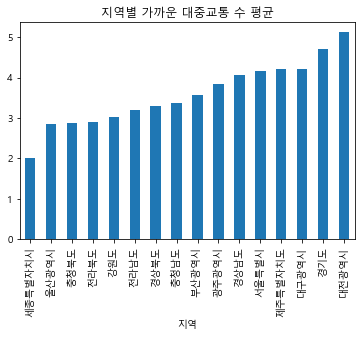

In [55]:
transport_mean_cnt_loc = transport_mean_cnt_loc.sort_values(by="가까운 대중교통 수")
transport_mean_cnt_loc["가까운 대중교통 수"].plot(kind="bar")
plt.title("지역별 가까운 대중교통 수 평균")

## 주차전쟁+원인 뉴스 크롤링

In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
from konlpy.tag import Okt
import nltk
from wordcloud import WordCloud 

In [2]:
url_list = ["https://search.naver.com/search.naver?where=news&sm=tab_jum&query=%EC%A3%BC%EC%B0%A8%EC%A0%84%EC%9F%81+%2B+%EC%9B%90%EC%9D%B8",
           "https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%EC%A3%BC%EC%B0%A8%EC%A0%84%EC%9F%81%20%2B%20%EC%9B%90%EC%9D%B8&sort=0&photo=0&field=0&pd=0&ds=&de=&cluster_rank=11&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:all,a:all&start=11",
           "https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%EC%A3%BC%EC%B0%A8%EC%A0%84%EC%9F%81%20%2B%20%EC%9B%90%EC%9D%B8&sort=0&photo=0&field=0&pd=0&ds=&de=&cluster_rank=22&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:all,a:all&start=21",
           "https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%EC%A3%BC%EC%B0%A8%EC%A0%84%EC%9F%81%20%2B%20%EC%9B%90%EC%9D%B8&sort=0&photo=0&field=0&pd=0&ds=&de=&cluster_rank=58&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:all,a:all&start=31"]

In [3]:
title_text=[]
for url in url_list:
    page=urlopen(url)
    soup=BeautifulSoup(page,"html.parser")
    title = soup.find("ul", class_ = "list_news").find_all("a", class_="news_tit")
    preview = soup.find("ul", class_ = "list_news").find_all("a", class_="api_txt_lines")
    for i in range(len(title)):
        title_text.append(title[i].get_text())
        title_text.append(preview[i].get_text())

title_text

['원상복구 미적대는 불법 주차장 왜 많나',
 '도심 주차난의 한 원인이 되고 있음은 불 보듯 뻔한 일이다. 더 큰 문제는 장시간 소요되는 처벌 규정을... 차량 대수를 억제할 수 없는 일이고 보면 이제 주차 전쟁은 일상의 다반사다. 이를 최소화하는 것은 그 비율이 80...',
 '[김화진칼럼]주차 전쟁',
 '무개념 주차의 원인은 자동차 보호 심리인데 아예 두 면적을 차지해버리는 만용도 부린다. 단위 주차 면적이 지나치게 협소한 것도 원인이다. 그러나 매사 그렇듯이 주차 전쟁에서도 한 가지 기준은 지켜져야 한다. 염치다.',
 '[스토리뉴스 #더]한국에 살면 다들 겪는다는 ‘이 전쟁’',
 '사회적인 해결 과제가 돼버린 주차전쟁의 원인은 근본적으로 관련 규정에 있다. 사람들이 보유한 차량의 대수가 늘어나는 속도를, 규정이 따라가지 못한 것이다. 주차장 설치 기준은 법으로 정해져있다. 면적에 따른...',
 "전기차·캠핑카에 밀려…갈수록 '주차 대란'",
 '속 주차장 부족 문제로 이웃 간에 갈등이 잦아지고 있다. 차량은 늘어나는데 주차장은 줄어드는 데 원인이... ○전기차·캠핑카로 혼잡해진 주차장 캠핑 문화 확산과 전기차 등장이 ‘주차전쟁’의 또 다른 이유라는...',
 "아파트 주차장 설치 기준 '14년' 만에 손본다",
 '주변 주차 전쟁은 갈수록 심각해지고 있습니다. ◀ＳＹＮ▶ 아파트 입주민"한 대를 더 (차량) 등록하면 20만... 20만 원 내고 등록을 할 수가 없죠." 14년째 그대로인 주차장 설치 기준이 가장 큰 원인입니다. 올해 청주지역...',
 "'제보자들' 아파트 지하 주차장을 두고 벌어진 주차 전쟁, 원인은 순번제 때문...",
 "24일 '제보자들'에서는 광주의 한 아파트에서 매일 주차 전쟁을 치르고 있다는 제보를 받고 찾아갔다. 지하 주차장에 빈 곳이 있는데도 주차를 할 수 없다고 하는데 대체 무슨 사연일까? 이 아파트에는 총 240세대가...",
 '"추석연휴, 두칸 주차 참교육… \'트렁크\'로 내렸다"[여車저車]',
 '그래

In [4]:
okt = Okt()
title_word = []
for i in range(len(title_text)):
    noun = okt.nouns(title_text[i])
    for j in noun:
        title_word.append(j)
title_word

['원상',
 '복구',
 '미적',
 '불법',
 '주차장',
 '왜',
 '도심',
 '주차',
 '난의',
 '원인',
 '음',
 '불',
 '일이',
 '더',
 '문제',
 '장시간',
 '소요',
 '처벌',
 '규정',
 '차량',
 '대수',
 '억제',
 '수',
 '일이',
 '이제',
 '주차',
 '전쟁',
 '일상',
 '다반사',
 '최소',
 '것',
 '그',
 '비율',
 '김화',
 '진',
 '칼럼',
 '주차',
 '전쟁',
 '무',
 '개념',
 '주차',
 '원인',
 '자동차',
 '보호',
 '심리',
 '아예',
 '두',
 '면적',
 '차지',
 '만용',
 '부린다',
 '단위',
 '주차',
 '면적',
 '협소',
 '것',
 '원인',
 '매사',
 '주차',
 '전쟁',
 '가지',
 '기준',
 '염치',
 '스토리',
 '뉴스',
 '한국',
 '살',
 '이',
 '전쟁',
 '사회',
 '해결',
 '과제',
 '주차',
 '전쟁',
 '원인',
 '근본',
 '관련',
 '규정',
 '사람',
 '보유',
 '차량',
 '대수',
 '속도',
 '규정',
 '못',
 '것',
 '주차장',
 '설치',
 '기준',
 '법',
 '면적',
 '전기차',
 '캠핑카',
 '갈수록',
 '주차',
 '대란',
 '속',
 '주차장',
 '부족',
 '문제',
 '이웃',
 '간',
 '갈등',
 '차량',
 '주차장',
 '데',
 '원인',
 '전기차',
 '캠핑카',
 '주차장',
 '캠핑',
 '문화',
 '확산',
 '전기차',
 '등장',
 '주차',
 '전쟁',
 '의',
 '또',
 '다른',
 '이유',
 '아파트',
 '주차장',
 '설치',
 '기준',
 '손',
 '주변',
 '주차',
 '전쟁',
 '갈수록',
 '아파트',
 '입',
 '주민',
 '더',
 '차량',
 '등록',
 '원',
 '등록',
 '수가',
 '그대로',
 '주차장',
 '설치',
 '기준',
 '

In [22]:
stop_words = ["원상","미적","왜","음","불","일이","더","것","그","진","무","두","부린다","가지","속","간","데","의","또","살","이","못","손","입","원","수가",
"제","때문","이","총","로","여","저","후","로","점","건너","요","박건","영","채","부수","더니","유유","다른","화가","대거","시","난이","솔","등",
"주요","노","외주","차장","왜","그","이용철","기자","새","저","뭘","반면","중","그림","떡","크게","가지","위","시유","면서","고","내","좀","곳",
"등","은","면","대가","간","개","구","이면","크게","태","시","중","배","이모","김","모씨","벌이","점도","점","또","률","알","수","더없이","하나로",
"턱","증","면서","섭","북갑","위해","채운","물이","통","원사","씨","누군가","하나","바로","정병","임","수의","관","유","동안","그것","테스",
"포스","갈수록","아예","당분간","가장"]

title_word = [each_word for each_word in title_word if each_word not in stop_words]
print(len(title_word))

1040


In [23]:
ko = nltk.Text(title_word, name="주차전쟁원인제목")

data = ko.vocab().most_common(100)
data

[('주차', 106),
 ('전쟁', 56),
 ('주차장', 41),
 ('원인', 41),
 ('차량', 20),
 ('아파트', 18),
 ('주택', 12),
 ('기준', 10),
 ('대수', 9),
 ('해소', 9),
 ('부족', 8),
 ('광주', 8),
 ('매일', 8),
 ('주택가', 8),
 ('갈등', 7),
 ('불법', 6),
 ('근본', 6),
 ('설치', 6),
 ('등록', 6),
 ('차', 6),
 ('도심', 5),
 ('규정', 5),
 ('자동차', 5),
 ('이웃', 5),
 ('지하', 5),
 ('도시', 5),
 ('서울', 5),
 ('대책', 5),
 ('분석', 5),
 ('앞', 5),
 ('수요', 5),
 ('천안시', 5),
 ('문제', 4),
 ('일상', 4),
 ('관련', 4),
 ('단지', 4),
 ('공간', 4),
 ('부지', 4),
 ('제도', 4),
 ('강릉', 4),
 ('가구', 4),
 ('반복', 4),
 ('증가', 4),
 ('사업', 4),
 ('지목', 4),
 ('예측', 4),
 ('생활', 4),
 ('면적', 3),
 ('전기차', 3),
 ('이유', 3),
 ('뉴스', 3),
 ('해결', 3),
 ('법', 3),
 ('세대', 3),
 ('주차공간', 3),
 ('시내', 3),
 ('포항', 3),
 ('인근', 3),
 ('도심지', 3),
 ('운영', 3),
 ('이용', 3),
 ('화물차', 3),
 ('몸살', 3),
 ('차고', 3),
 ('확보', 3),
 ('화성시', 3),
 ('지적', 3),
 ('거주', 3),
 ('대형', 3),
 ('단속', 3),
 ('근거', 3),
 ('교통', 3),
 ('지구', 3),
 ('신규', 3),
 ('송정역', 3),
 ('집', 3),
 ('장애인', 3),
 ('개정', 3),
 ('허가', 3),
 ('관리', 3),
 ('후보', 3),
 ('원룸', 3)

## 뉴스 4페이지 title만

(-0.5, 399.5, 199.5, -0.5)

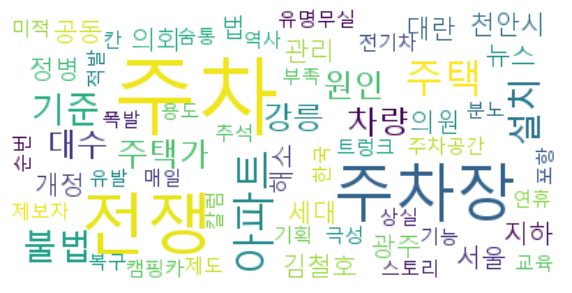

In [14]:
import matplotlib.pyplot as plt
wc=WordCloud(max_font_size=60, background_color = "white",max_words=60, 
             font_path="C:/Windows/Fonts/malgun.ttf").generate_from_frequencies(dict(data))

#stopwords쓸수 없음
#그냥 generate쓸 수 없음
#generate_from_frequencies할 때 데이터는 dict형태로 넘겨줘야 함
#원래 형식이 tuple로 되어있음

plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation = "bilinear")
#image를 불러올 때 WordCloud의 recolor함수 사용해서 색깔 불러오기
plt.axis("off")

## 뉴스 4페이지 title+preview

(-0.5, 399.5, 199.5, -0.5)

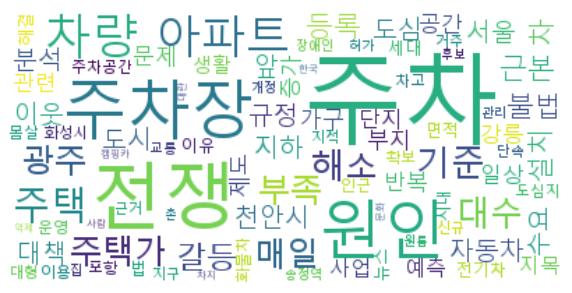

In [34]:
import matplotlib.pyplot as plt
wc=WordCloud(max_font_size=70, background_color = "white",max_words=90, 
             font_path="C:/Windows/Fonts/malgun.ttf").generate_from_frequencies(dict(data))

plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation = "bilinear")

plt.axis("off")

In [7]:
stop_words = ["원상","미적","왜","음","불","일이","더","것","그","진","무","두","부린다","가지","속","간","데","의","또","살","이","못","손","입","원","수가",
"제","때문","이","총","로","여","저","후","로","점","건너","요","박건","영","채","부수","더니","유유","다른","화가","대거","시","난이","솔","등",
"주요","노","외주","차장","왜","그","이용철","기자","새","저","뭘","반면","중","그림","떡","크게","가지","위","시유","면서","고","내","좀","곳",
"등","은","면","대가","간","개","구","이면","크게","태","시","중","배","이모","김","모씨","벌이","점도","점","또","률","알","수","더없이","하나로",
"턱","증","면서","섭","북갑","위해","채운","물이","통","원사","씨","누군가","하나","바로","정병","임","수의","관","유","동안","그것","테스",
"포스","갈수록","아예","당분간","가장","주차","전쟁","주차장","원인","광주","촌","관련"]

title_word = [each_word for each_word in title_word if each_word not in stop_words]

ko = nltk.Text(title_word, name="주차전쟁원인")

data = ko.vocab().most_common(100)
data

[('차량', 20),
 ('아파트', 18),
 ('주택', 12),
 ('기준', 10),
 ('대수', 9),
 ('해소', 9),
 ('부족', 8),
 ('매일', 8),
 ('주택가', 8),
 ('갈등', 7),
 ('불법', 6),
 ('근본', 6),
 ('설치', 6),
 ('등록', 6),
 ('차', 6),
 ('도심', 5),
 ('규정', 5),
 ('자동차', 5),
 ('이웃', 5),
 ('지하', 5),
 ('도시', 5),
 ('서울', 5),
 ('대책', 5),
 ('분석', 5),
 ('앞', 5),
 ('수요', 5),
 ('천안시', 5),
 ('문제', 4),
 ('일상', 4),
 ('단지', 4),
 ('공간', 4),
 ('부지', 4),
 ('제도', 4),
 ('강릉', 4),
 ('가구', 4),
 ('반복', 4),
 ('증가', 4),
 ('사업', 4),
 ('지목', 4),
 ('예측', 4),
 ('생활', 4),
 ('면적', 3),
 ('뉴스', 3),
 ('해결', 3),
 ('법', 3),
 ('전기차', 3),
 ('이유', 3),
 ('세대', 3),
 ('주차공간', 3),
 ('시내', 3),
 ('포항', 3),
 ('인근', 3),
 ('도심지', 3),
 ('운영', 3),
 ('이용', 3),
 ('화물차', 3),
 ('몸살', 3),
 ('차고', 3),
 ('확보', 3),
 ('화성시', 3),
 ('지적', 3),
 ('거주', 3),
 ('대형', 3),
 ('단속', 3),
 ('근거', 3),
 ('교통', 3),
 ('지구', 3),
 ('신규', 3),
 ('송정역', 3),
 ('집', 3),
 ('장애인', 3),
 ('개정', 3),
 ('허가', 3),
 ('관리', 3),
 ('후보', 3),
 ('원룸', 3),
 ('억제', 2),
 ('차지', 2),
 ('한국', 2),
 ('사람', 2),
 ('보유', 2),
 ('캠핑카', 2),
 ('

## 뉴스 4페이지 title+preview 중 (검색어인) 주차, 전쟁, 주차장,원인 이라는 단어를 뺀 것

(-0.5, 399.5, 199.5, -0.5)

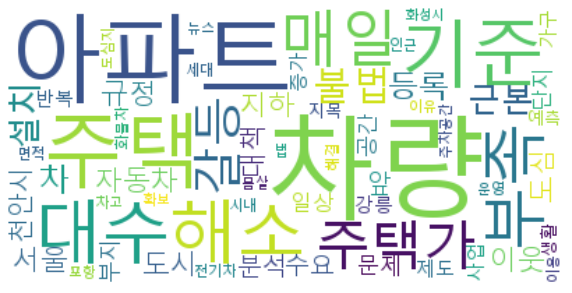

In [8]:
import matplotlib.pyplot as plt
wc=WordCloud(max_font_size=80, background_color = "white",max_words=60, 
             font_path="C:/Windows/Fonts/malgun.ttf").generate_from_frequencies(dict(data))

#stopwords쓸수 없음
#그냥 generate쓸 수 없음
#generate_from_frequencies할 때 데이터는 dict형태로 넘겨줘야 함
#원래 형식이 tuple로 되어있음

plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation = "bilinear")
#image를 불러올 때 WordCloud의 recolor함수 사용해서 색깔 불러오기
plt.axis("off")

In [3]:
page = urlopen("https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%EC%A3%BC%EC%B0%A8%EC%A0%84%EC%9F%81%2B%EC%9B%90%EC%9D%B8&sort=0&photo=0&field=0&pd=0&ds=&de=&cluster_rank=22&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:all,a:all&start=1")
soup = BeautifulSoup(page, "html.parser")
title = soup.find("ul", class_ = "list_news").find_all("a", class_="news_tit")
preview = soup.find("ul", class_ = "list_news").find_all("a", class_="api_txt_lines")

In [4]:
title_text = []
for i in range(len(title)):
    title_text.append(title[i].get_text())
    
title_text

['원상복구 미적대는 불법 주차장 왜 많나',
 '[김화진칼럼]주차 전쟁',
 "전기차·캠핑카에 밀려…갈수록 '주차 대란'",
 '[스토리뉴스 #더]한국에 살면 다들 겪는다는 ‘이 전쟁’',
 "아파트 주차장 설치 기준 '14년' 만에 손본다",
 "'제보자들' 아파트 지하 주차장을 두고 벌어진 주차 전쟁, 원인은 순번제 때문...",
 '"추석연휴, 두칸 주차 참교육… \'트렁크\'로 내렸다"[여車저車]',
 '주차공간 넓히는 아파트…주차전쟁 숨통 트이나',
 '포항역사 불법주차 극성…주차장 부족이 원인?',
 '[더깊은뉴스]‘분노 폭발’ 주차 전쟁…제도 유명무실']

In [6]:
preview_text = []
for i in range(len(preview)):
    preview_text.append(preview[i].get_text())
    
preview_text

['도심 주차난의 한 원인이 되고 있음은 불 보듯 뻔한 일이다. 더 큰 문제는 장시간 소요되는 처벌 규정을... 차량 대수를 억제할 수 없는 일이고 보면 이제 주차 전쟁은 일상의 다반사다. 이를 최소화하는 것은 그 비율이 80...',
 '무개념 주차의 원인은 자동차 보호 심리인데 아예 두 면적을 차지해버리는 만용도 부린다. 단위 주차 면적이 지나치게 협소한 것도 원인이다. 그러나 매사 그렇듯이 주차 전쟁에서도 한 가지 기준은 지켜져야 한다. 염치다.',
 '속 주차장 부족 문제로 이웃 간에 갈등이 잦아지고 있다. 차량은 늘어나는데 주차장은 줄어드는 데 원인이... ○전기차·캠핑카로 혼잡해진 주차장 캠핑 문화 확산과 전기차 등장이 ‘주차전쟁’의 또 다른 이유라는...',
 '사회적인 해결 과제가 돼버린 주차전쟁의 원인은 근본적으로 관련 규정에 있다. 사람들이 보유한 차량의 대수가 늘어나는 속도를, 규정이 따라가지 못한 것이다. 주차장 설치 기준은 법으로 정해져있다. 면적에 따른...',
 '주변 주차 전쟁은 갈수록 심각해지고 있습니다. ◀ＳＹＮ▶ 아파트 입주민"한 대를 더 (차량) 등록하면 20만... 20만 원 내고 등록을 할 수가 없죠." 14년째 그대로인 주차장 설치 기준이 가장 큰 원인입니다. 올해 청주지역...',
 "24일 '제보자들'에서는 광주의 한 아파트에서 매일 주차 전쟁을 치르고 있다는 제보를 받고 찾아갔다. 지하 주차장에 빈 곳이 있는데도 주차를 할 수 없다고 하는데 대체 무슨 사연일까? 이 아파트에는 총 240세대가...",
 '그래도 주차 자리 전쟁인데, 검은색 SUV 차량을 운전하는 운전자가 혼자서 주차자리를 두 자리 차지하고... 검은 SUV 차량이 원인 제공자가 아닐 것 같다는 의견과, 연락처를 제거하려 한다는 글쓴이를 질책하는 의견도...',
 '광주시내 오래된 아파트단지에선 퇴근 후 주차전쟁이 일상이 된 지 오래다. 조금만 늦으면 차 댈 곳을 찾지... 5%로 광주가 아파트 도시라는 점에서 공동주택의 부족한 주차 공간은 갈등을 

In [7]:
okt = Okt()
title_word = []
for i in range(len(title_text)):
    noun = okt.nouns(title_text[i])
    for j in noun:
        title_word.append(j)
title_word

['원상',
 '복구',
 '미적',
 '불법',
 '주차장',
 '왜',
 '김화',
 '진',
 '칼럼',
 '주차',
 '전쟁',
 '전기차',
 '캠핑카',
 '갈수록',
 '주차',
 '대란',
 '스토리',
 '뉴스',
 '한국',
 '살',
 '이',
 '전쟁',
 '아파트',
 '주차장',
 '설치',
 '기준',
 '손',
 '제보자',
 '아파트',
 '지하',
 '주차장',
 '주차',
 '전쟁',
 '원인',
 '순번',
 '제',
 '때문',
 '추석',
 '연휴',
 '칸',
 '주차',
 '교육',
 '트렁크',
 '로',
 '여',
 '저',
 '주차공간',
 '아파트',
 '주차',
 '전쟁',
 '숨통',
 '포항',
 '역사',
 '불법',
 '주차',
 '극성',
 '주차장',
 '부족',
 '원인',
 '더',
 '뉴스',
 '분노',
 '폭발',
 '주차',
 '전쟁',
 '제도',
 '유명무실']

In [8]:
#### 불용어 처리

#불용어 사전 만들기
stop_words = ["원상","왜","김화","진","칼럼","갈수록","스토리","살","이","손","제","때문","로","여","저","더"]

title_word = [each_word for each_word in title_word if each_word not in stop_words]
print(len(title_word))

51


In [9]:
#### 빈도수 처리(워드 카운팅)

#nltk : 빈도를 계산해서 정렬까지 시켜주는 

ko = nltk.Text(title_word, name="주차전쟁원인제목")
#이름 넣어야 되는데 아무거나 지정하면 됨

data = ko.vocab().most_common(100)
#얘는 빈도를 비율로 나타낸건 아니고 실제 counting 수 확인
data

[('주차', 7),
 ('전쟁', 5),
 ('주차장', 4),
 ('아파트', 3),
 ('불법', 2),
 ('뉴스', 2),
 ('원인', 2),
 ('복구', 1),
 ('미적', 1),
 ('전기차', 1),
 ('캠핑카', 1),
 ('대란', 1),
 ('한국', 1),
 ('설치', 1),
 ('기준', 1),
 ('제보자', 1),
 ('지하', 1),
 ('순번', 1),
 ('추석', 1),
 ('연휴', 1),
 ('칸', 1),
 ('교육', 1),
 ('트렁크', 1),
 ('주차공간', 1),
 ('숨통', 1),
 ('포항', 1),
 ('역사', 1),
 ('극성', 1),
 ('부족', 1),
 ('분노', 1),
 ('폭발', 1),
 ('제도', 1),
 ('유명무실', 1)]

## 뉴스 1페이지 title

(-0.5, 399.5, 199.5, -0.5)

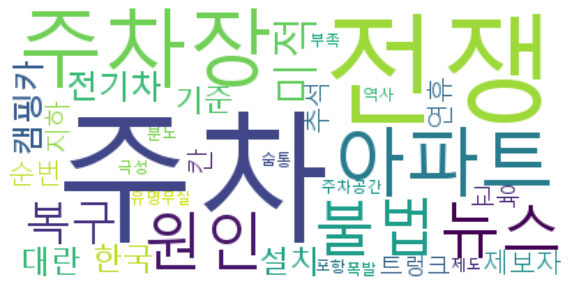

In [10]:
### 워드 클라우드 출력
import matplotlib.pyplot as plt
wc=WordCloud(max_font_size=100, background_color = "white",max_words=40, 
             font_path="C:/Windows/Fonts/malgun.ttf").generate_from_frequencies(dict(data))

#stopwords쓸수 없음
#그냥 generate쓸 수 없음
#generate_from_frequencies할 때 데이터는 dict형태로 넘겨줘야 함
#원래 형식이 tuple로 되어있음

plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation = "bilinear")
#image를 불러올 때 WordCloud의 recolor함수 사용해서 색깔 불러오기
plt.axis("off")

In [13]:
### preview_word도 합쳐주기
okt = Okt()
for i in range(len(preview_text)):
    noun = okt.nouns(preview_text[i])
    for j in noun:
        title_word.append(j)
title_word


['복구',
 '미적',
 '불법',
 '주차장',
 '주차',
 '전쟁',
 '전기차',
 '캠핑카',
 '주차',
 '대란',
 '뉴스',
 '한국',
 '전쟁',
 '아파트',
 '주차장',
 '설치',
 '기준',
 '제보자',
 '아파트',
 '지하',
 '주차장',
 '주차',
 '전쟁',
 '원인',
 '순번',
 '추석',
 '연휴',
 '칸',
 '주차',
 '교육',
 '트렁크',
 '주차공간',
 '아파트',
 '주차',
 '전쟁',
 '숨통',
 '포항',
 '역사',
 '불법',
 '주차',
 '극성',
 '주차장',
 '부족',
 '원인',
 '뉴스',
 '분노',
 '폭발',
 '주차',
 '전쟁',
 '제도',
 '유명무실',
 '도심',
 '주차',
 '난의',
 '원인',
 '음',
 '불',
 '일이',
 '더',
 '문제',
 '장시간',
 '소요',
 '처벌',
 '규정',
 '차량',
 '대수',
 '억제',
 '수',
 '일이',
 '이제',
 '주차',
 '전쟁',
 '일상',
 '다반사',
 '최소',
 '것',
 '그',
 '비율',
 '무',
 '개념',
 '주차',
 '원인',
 '자동차',
 '보호',
 '심리',
 '아예',
 '두',
 '면적',
 '차지',
 '만용',
 '부린다',
 '단위',
 '주차',
 '면적',
 '협소',
 '것',
 '원인',
 '매사',
 '주차',
 '전쟁',
 '가지',
 '기준',
 '염치',
 '속',
 '주차장',
 '부족',
 '문제',
 '이웃',
 '간',
 '갈등',
 '차량',
 '주차장',
 '데',
 '원인',
 '전기차',
 '캠핑카',
 '주차장',
 '캠핑',
 '문화',
 '확산',
 '전기차',
 '등장',
 '주차',
 '전쟁',
 '의',
 '또',
 '다른',
 '이유',
 '사회',
 '해결',
 '과제',
 '주차',
 '전쟁',
 '원인',
 '근본',
 '관련',
 '규정',
 '사람',
 '보유',
 '차량',
 '대수',
 '속

In [17]:
#### 불용어 처리 다시

#불용어 사전 만들기
stop_words = ["원상","왜","김화","진","칼럼","갈수록","스토리","살","이","손","제","때문","로","여","저","더",
"난의","음","일이","더","이제","것","그","무","아예","두","부린다","것","매사","가지","속","간","데",
"의","또","관련","못","입","더","원","수가","그대로","가장","올해","곳","이","연일","총","글","후","로","점","건너","유청",
"요","영","채","마구","부수","더니","유유","화가","국철"]
title_word = [each_word for each_word in title_word if each_word not in stop_words]
print(len(title_word))

597


In [18]:
#### 빈도수 처리(워드 카운팅)

#nltk : 빈도를 계산해서 정렬까지 시켜주는 

ko = nltk.Text(title_word, name="주차전쟁원인제목+미리보기")
#이름 넣어야 되는데 아무거나 지정하면 됨

data = ko.vocab().most_common(100)
#얘는 빈도를 비율로 나타낸건 아니고 실제 counting 수 확인
data

[('주차', 55),
 ('전쟁', 35),
 ('원인', 29),
 ('주차장', 25),
 ('차량', 24),
 ('아파트', 18),
 ('기준', 10),
 ('규정', 9),
 ('면적', 9),
 ('광주', 9),
 ('전기차', 7),
 ('설치', 7),
 ('포항', 7),
 ('문제', 6),
 ('대수', 6),
 ('수', 6),
 ('일상', 6),
 ('차지', 6),
 ('갈등', 6),
 ('다른', 6),
 ('등록', 6),
 ('자리', 6),
 ('의견', 6),
 ('차', 6),
 ('뉴스', 5),
 ('캠핑카', 4),
 ('한국', 4),
 ('제보자', 4),
 ('지하', 4),
 ('역사', 4),
 ('부족', 4),
 ('도심', 3),
 ('불', 3),
 ('장시간', 3),
 ('소요', 3),
 ('처벌', 3),
 ('억제', 3),
 ('다반사', 3),
 ('최소', 3),
 ('비율', 3),
 ('개념', 3),
 ('자동차', 3),
 ('보호', 3),
 ('심리', 3),
 ('만용', 3),
 ('단위', 3),
 ('협소', 3),
 ('염치', 3),
 ('이웃', 3),
 ('캠핑', 3),
 ('문화', 3),
 ('확산', 3),
 ('등장', 3),
 ('이유', 3),
 ('사회', 3),
 ('해결', 3),
 ('과제', 3),
 ('근본', 3),
 ('사람', 3),
 ('보유', 3),
 ('속도', 3),
 ('법', 3),
 ('주변', 3),
 ('주민', 3),
 ('청주', 3),
 ('지역', 3),
 ('매일', 3),
 ('제보', 3),
 ('빈', 3),
 ('대체', 3),
 ('무슨', 3),
 ('세대', 3),
 ('검은색', 3),
 ('운전', 3),
 ('운전자', 3),
 ('혼자', 3),
 ('제공', 3),
 ('연락처', 3),
 ('제거', 3),
 ('질책', 3),
 ('시내', 3),
 ('단지', 3),
 ('

In [28]:
len(data)

100

## 뉴스 한 페이지 title+미리보기 내용

(-0.5, 399.5, 199.5, -0.5)

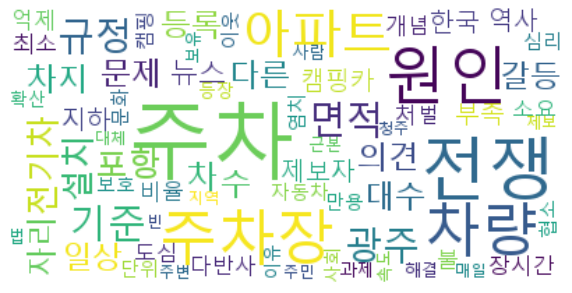

In [27]:
### 워드 클라우드 출력
import matplotlib.pyplot as plt
wc=WordCloud(max_font_size=60, background_color = "white",max_words=70, 
             font_path="C:/Windows/Fonts/malgun.ttf").generate_from_frequencies(dict(data))

#stopwords쓸수 없음
#그냥 generate쓸 수 없음
#generate_from_frequencies할 때 데이터는 dict형태로 넘겨줘야 함
#원래 형식이 tuple로 되어있음

plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation = "bilinear")
#image를 불러올 때 WordCloud의 recolor함수 사용해서 색깔 불러오기
plt.axis("off")

## 주차장 확보율 시각화

In [1]:
import pandas as pd
parking_rate = pd.read_excel("parking_data/전국주차장확보율.xlsx", index_col=[0], header=[0,1])
parking_rate.head()

C:\Users\gyeoa\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


행정구역별                2015                                            2016  \
행정구역별 주차장확보율(A÷B×100) (%) 주차장면수(A) (면) 자동차등록대수(B) (대) 주차장확보율(A÷B×100) (%)   
전국                   97.7   20511002.0     20989885.0                98.3   
서울특별시               126.9    3877326.0      3056588.0               129.2   
부산광역시               103.1    1294561.0      1255722.0                99.6   
대구광역시                88.3     977003.0      1106002.0                88.1   
인천광역시                81.0    1097560.0      1355207.0                81.0   

행정구역별                                            2017               \
행정구역별 주차장면수(A) (면) 자동차등록대수(B) (대) 주차장확보율(A÷B×100) (%) 주차장면수(A) (면)   
전국      21441032.0     21803351.0                98.5   22198788.0   
서울특별시    3983291.0      3083007.0               130.1    4053875.0   
부산광역시    1290115.0      1295316.0               104.0    1387215.0   
대구광역시     996083.0      1130811.0                88.1    1019133.0   
인천광역시    1164028.0      1437373.0                80.6    1217585.0   

행정구역별                               2018                              \
행정구역별 자동차등록대수(B) (대) 주차장확보율(A÷B×100) (%) 주차장면수(A) (면) 자동차등록대수(B) (대)   
전국        22528295.0               101.0   23434257.0     23202555.0   
서울특별시      3116256.0               132.2    4129723.0      3124651.0   
부산광역시      1333224.0               103.4    1417361.0      1371172.0   
대구광역시      1157053.0                88.7    1045355.0      1178353.0   
인천광역시      1510319.0                81.4    1284526.0      1577607.0   

행정구역별                2019                                            2020  \
행정구역별 주차장확보율(A÷B×100) (%) 주차장면수(A) (면) 자동차등록대수(B) (대) 주차장확보율(A÷B×100) (%)   
전국                  103.8   24584466.0     23677366.0                   -   
서울특별시               136.1    4250682.0      3124157.0               137.1   
부산광역시               110.6    1542526.0      1395183.0                   -   
대구광역시                93.0    1107117.0      1190154.0                   -   
인천광역시                80.1    1310332.0      1635323.0                   -   

행정구역별                              
행정구역별 주차장면수(A) (면) 자동차등록대수(B) (대)  
전국               -              -  
서울특별시    4327614.0      3157361.0  
부산광역시            -              -  
대구광역시            -              -  
인천광역시            -              -

In [2]:
parking_rate_target = parking_rate.iloc[:,[0,3,6,9,12,15]]

In [3]:
parking_rate_target = parking_rate_target.droplevel(1, axis=1)
parking_rate_target.head()

행정구역별,2015,2016,2017,2018,2019,2020
전국,97.7,98.3,98.5,101.0,103.8,-
서울특별시,126.9,129.2,130.1,132.2,136.1,137.1
부산광역시,103.1,99.6,104.0,103.4,110.6,-
대구광역시,88.3,88.1,88.1,88.7,93.0,-
인천광역시,81.0,81.0,80.6,81.4,80.1,-


In [4]:
parking_all_num = parking_rate.iloc[:,[1,4,7,10,13,16]]

In [5]:
parking_all_num = parking_all_num.droplevel(1, axis=1)
parking_all_num = parking_all_num[parking_all_num.columns[2:-1]]
parking_all_num.loc[["전국"]]

행정구역별,2017,2018,2019
전국,22198788.0,23434257.0,24584466.0


In [6]:
parking_rate_target = parking_rate_target[parking_rate_target.columns[2:-1]]
parking_rate_target = parking_rate_target.sort_values(by="2019", ascending=False)

행정구역별,2017,2018,2019
전국,98.5,101.0,103.8


행정구역별,2017,2018,2019
전국,22198788.0,23434257.0,24584466.0


<AxesSubplot:xlabel='행정구역별'>

C:\Users\gyeoa\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54665 (\N{HANGUL SYLLABLE HAENG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gyeoa\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gyeoa\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gyeoa\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50669 (\N{HANGUL SYLLABLE YEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gyeoa\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gyeoa\anac

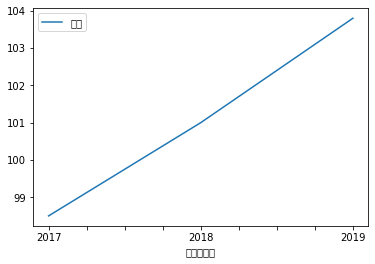

In [7]:
display(parking_rate_target.loc[["전국"]])
display(parking_all_num.loc[["전국"]])
parking_rate_target.loc[["전국"]].T.plot(label="주차확보율")

In [8]:
parking_all_graph = pd.DataFrame({"전국주차장확보율": parking_rate_target.T["전국"], "전국주차면수":parking_all_num.T["전국"]})
parking_all_graph

,전국주차장확보율,전국주차면수
행정구역별,,
2017,98.5,22198788.0
2018,101.0,23434257.0
2019,103.8,24584466.0


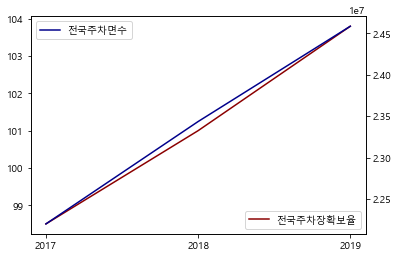

In [10]:
ax = plt.subplot()
ax.plot(parking_all_graph.index, parking_all_graph["전국주차장확보율"], color="darkred",
       label="전국주차장확보율")

ax1 = ax.twinx()
ax1.plot(parking_all_graph.index, parking_all_graph["전국주차면수"],
        color="darkblue", label="전국주차면수")
ax1.legend()
ax.legend(loc="lower right")

Text(0, 0.5, '주차면수')

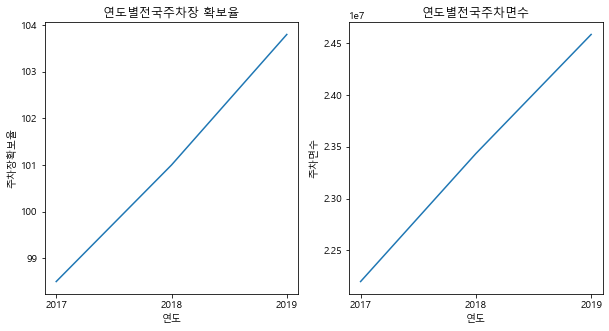

In [11]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(parking_all_graph.index, parking_all_graph["전국주차장확보율"])
plt.title("연도별전국주차장 확보율")
plt.xlabel("연도")
plt.ylabel("주차장확보율")
plt.subplot(1,2,2)
plt.plot(parking_all_graph.index, parking_all_graph["전국주차면수"])
plt.title("연도별전국주차면수")
plt.xlabel("연도")
plt.ylabel("주차면수")

In [12]:
parking_rate_graph_loc = parking_rate_target.drop("전국").T

In [13]:
parking_rate_graph_loc

,서울특별시,대전광역시,강원도,부산광역시,경기도,세종특별자치시,울산광역시,충청남도,광주광역시,전라북도,경상남도,대구광역시,경상북도,충청북도,인천광역시,전라남도,제주특별자치도
행정구역별,,,,,,,,,,,,,,,,,
2017,130.1,110.3,108.0,104.0,98.8,102.0,118.4,95.1,93.6,81.6,93.1,88.1,85.0,93.6,80.6,74.7,65.4
2018,132.2,118.6,108.2,103.4,101.7,102.0,121.8,105.6,93.2,81.8,94.1,88.7,95.7,94.5,81.4,77.6,61.4
2019,136.1,118.4,117.9,110.6,110.2,106.7,99.9,99.9,98.5,97.7,95.1,93.0,90.6,84.1,80.1,77.6,66.5


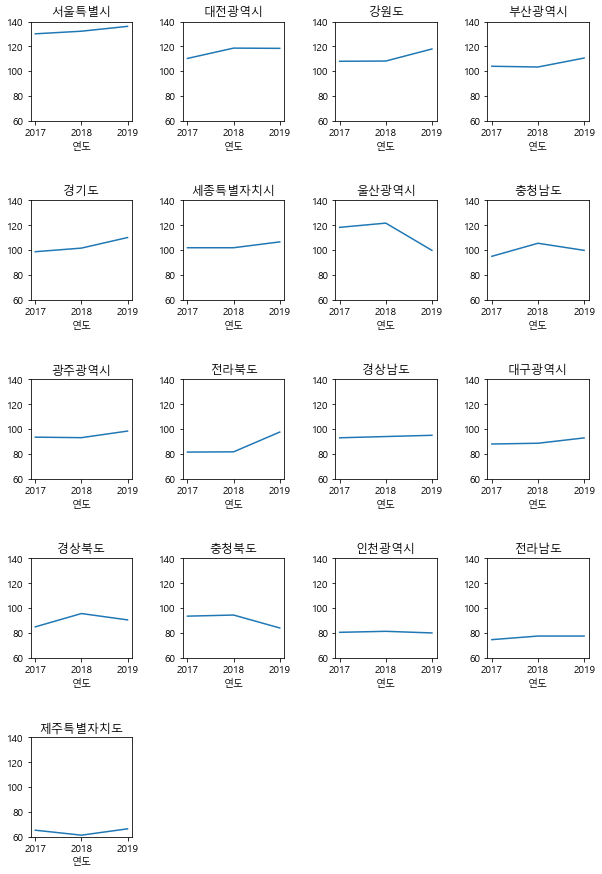

In [14]:
columns = parking_rate_graph_loc.columns

plt.figure(figsize=(10,15))
for col in columns:
    plt.subplot(5,4,list(columns).index(col)+1)
    parking_rate_graph_loc[col].plot()
    plt.subplots_adjust(wspace=0.5, hspace=0.8)
    plt.title(col)
    plt.xlabel("연도")
    plt.ylim(60,140)

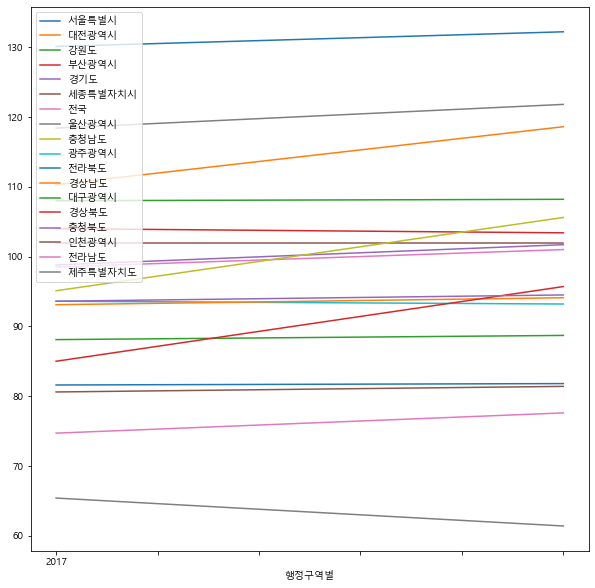

In [15]:
parking_rate_target[parking_rate_target.columns[:-1]].T.plot(figsize=(10,10))
plt.legend(loc="upper left")
# 대부분 비슷하거나 증가하는 추세

<AxesSubplot:>

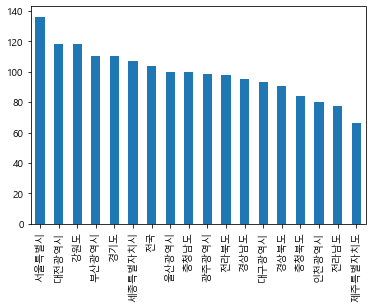

In [16]:
# 2019년 값으로 지역별 막대그래프
parking_rate_target["2019"].plot(kind="bar")

<AxesSubplot:>

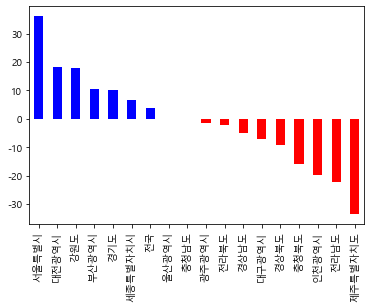

In [29]:
colors = ["blue","blue","blue","blue","blue","blue","blue","red","red", "red","red", "red","red", "red","red", "red","red", "red","red"]
(parking_rate_target["2019"]-100).plot(kind="bar", color=colors)

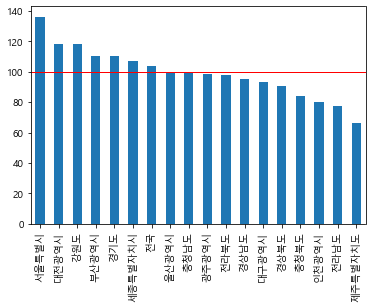

In [30]:
parking_rate_target["2019"].plot(kind="bar")
plt.axhline(y=100, color='r', linewidth=1)

In [28]:
parking_rate_target["2019"]

서울특별시      136.1
대전광역시      118.4
강원도        117.9
부산광역시      110.6
경기도        110.2
세종특별자치시    106.7
전국         103.8
울산광역시       99.9
충청남도        99.9
광주광역시       98.5
전라북도        97.7
경상남도        95.1
대구광역시       93.0
경상북도        90.6
충청북도        84.1
인천광역시       80.1
전라남도        77.6
제주특별자치도     66.5
Name: 2019, dtype: float64

## 주차장 확보율, 주차면수, 등록대수 한번에

In [286]:
parking_num = parking_rate.iloc[:,[1,4,7,10,13,16]]
parking_num = parking_num.droplevel(1, axis=1)
parking_num = parking_num[parking_num.columns[2:-1]]

In [288]:
car_num = parking_rate.iloc[:,[2,5,8,11,14,17]]
car_num = car_num.droplevel(1, axis=1)
car_num = car_num[car_num.columns[2:-1]]
car_num

행정구역별,2017,2018,2019
전국,22528295.0,23202555.0,23677366.0
서울특별시,3116256.0,3124651.0,3124157.0
부산광역시,1333224.0,1371172.0,1395183.0
대구광역시,1157053.0,1178353.0,1190154.0
인천광역시,1510319.0,1577607.0,1635323.0
광주광역시,649293.0,664316.0,676281.0
대전광역시,659619.0,669959.0,673899.0
울산광역시,549489.0,558106.0,565639.0
세종특별자치시,129765.0,147925.0,163339.0
경기도,5386022.0,5617611.0,5765692.0


In [299]:
parking_rate_target = parking_rate.iloc[:,[0,3,6,9,12,15]]
parking_rate_target = parking_rate_target.droplevel(1, axis=1)
parking_rate_target = parking_rate_target[parking_rate_target.columns[2:-1]]
parking_rate_target

행정구역별,2017,2018,2019
전국,98.5,101.0,103.8
서울특별시,130.1,132.2,136.1
부산광역시,104.0,103.4,110.6
대구광역시,88.1,88.7,93.0
인천광역시,80.6,81.4,80.1
광주광역시,93.6,93.2,98.5
대전광역시,110.3,118.6,118.4
울산광역시,118.4,121.8,99.9
세종특별자치시,102.0,102.0,106.7
경기도,98.8,101.7,110.2


In [312]:
columns = parking_rate_target.T.columns
columns

Index(['전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도',
       '제주특별자치도'],
      dtype='object')

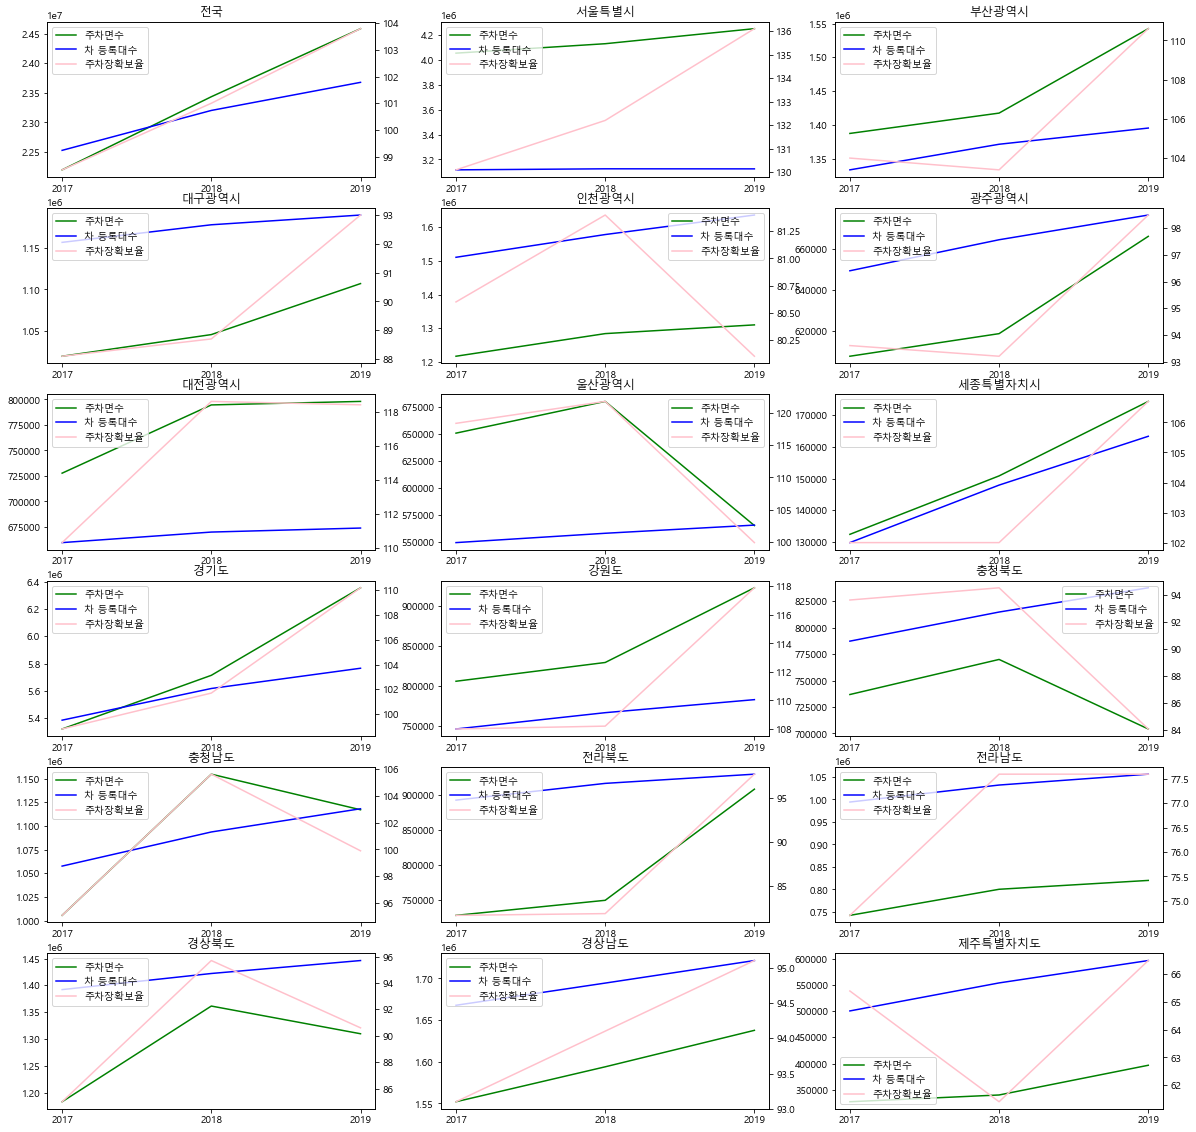

In [315]:
plt.figure(figsize=(20,20))
for col in columns:
    parking_target = parking_num.T[[col]]
    parking_target.columns=["주차면수"]
    car_target = car_num.T[[col]]
    car_target.columns=["차 등록대수"]
    parking_rate_graph = parking_rate_target.T[[col]].reset_index()
    parking_rate_graph.columns=["연도","주차장확보율"]

    target = pd.concat([parking_target,car_target], axis=1).reset_index()
    target.columns=["연도","주차면수","차 등록대수"]
    ax = plt.subplot(6,3,list(columns).index(col)+1)
    line1= ax.plot(target["연도"], target["주차면수"], color="green", label="주차면수")
    line2 = ax.plot(target["연도"], target["차 등록대수"], color="blue", label="차 등록대수")
    ax1 = ax.twinx()
    line3 = ax1.plot(parking_rate_graph["연도"], parking_rate_graph["주차장확보율"], color="pink", label="주차장확보율")
    lines = line1+line2+line3
    labels = [l.get_label() for l in lines]
    ax1.legend(lines, labels, loc='best')
    plt.title(col)

In [125]:
parking_lack = parking_rate_total[(parking_rate_total["2015"]["주차장확보율(A÷B×100) (%)"]<100)&(parking_rate_total["2016"]["주차장확보율(A÷B×100) (%)"]<100)&(parking_rate_total["2017"]["주차장확보율(A÷B×100) (%)"]<100)&(parking_rate_total["2018"]["주차장확보율(A÷B×100) (%)"]<100)]
parking_lack

행정구역별                  2015                                            2016  \
행정구역별   주차장확보율(A÷B×100) (%) 주차장면수(A) (면) 자동차등록대수(B) (대) 주차장확보율(A÷B×100) (%)   
대구광역시                  88.3     977003.0      1106002.0                88.1   
인천광역시                  81.0    1097560.0      1355207.0                81.0   
충청북도                   82.0     598510.0       730069.0                85.9   
전라북도                   76.6     643229.0       839181.0                83.7   
전라남도                   71.9     645660.0       897655.0                70.9   
경상북도                   83.4    1090158.0      1307495.0                81.7   
경상남도                   93.1    1455589.0      1564192.0                92.3   
제주특별자치도                61.8     268751.0       435015.0                63.9   

행정구역별                                              2017               \
행정구역별   주차장면수(A) (면) 자동차등록대수(B) (대) 주차장확보율(A÷B×100) (%) 주차장면수(A) (면)   
대구광역시       996083.0      1130811.0                88.1    1019133.0   
인천광역시      1164028.0      1437373.0                80.6    1217585.0   
충청북도        653628.0       760701.0                93.6     736768.0   
전라북도        727515.0       869002.0                81.6     728021.0   
전라남도        675067.0       952004.0                74.7     742501.0   
경상북도       1105870.0      1353654.0                85.0    1183378.0   
경상남도       1499476.0      1625244.0                93.1    1552008.0   
제주특별자치도     298548.0       467243.0                65.4     327125.0   

행정구역별                                 2018                              \
행정구역별   자동차등록대수(B) (대) 주차장확보율(A÷B×100) (%) 주차장면수(A) (면) 자동차등록대수(B) (대)   
대구광역시        1157053.0                88.7    1045355.0      1178353.0   
인천광역시        1510319.0                81.4    1284526.0      1577607.0   
충청북도          787188.0                94.5     769908.0       814698.0   
전라북도          892118.0                81.8     749456.0       915944.0   
전라남도          994318.0                77.6     800464.0      1032074.0   
경상북도         1392151.0                95.7    1361534.0      1422157.0   
경상남도         1667809.0                94.1    1593934.0      1694448.0   
제주특별자치도       500197.0                61.4     340013.0       553578.0   

행정구역별                  2019                                            2020  \
행정구역별   주차장확보율(A÷B×100) (%) 주차장면수(A) (면) 자동차등록대수(B) (대) 주차장확보율(A÷B×100) (%)   
대구광역시                  93.0    1107117.0      1190154.0                   -   
인천광역시                  80.1    1310332.0      1635323.0                   -   
충청북도                   84.1     704207.0       837602.0                   -   
전라북도                   97.7     907684.0       929061.0                   -   
전라남도                   77.6     820144.0      1056239.0                   -   
경상북도                   90.6    1309968.0      1446262.0                93.1   
경상남도                   95.1    1637723.0      1721503.0                   -   
제주특별자치도                66.5     396638.0       596215.0                   -   

행정구역별                                
행정구역별   주차장면수(A) (면) 자동차등록대수(B) (대)  
대구광역시              -              -  
인천광역시              -              -  
충청북도               -              -  
전라북도               -              -  
전라남도               -              -  
경상북도       1374311.0      1475389.0  
경상남도               -              -  
제주특별자치도            -              -

## 주차면수가 등록차량수보다 적은 지역_제공된 데이터 분석

In [71]:
parking_gubun = pd.read_csv("parking_data/면적별_세대수_구분.csv")
parking_gubun.head()

,단지코드,총세대수,임대건물구분,지역,빈집,노선수,버스,area10,area20,area30,area40,area50,area60,area70,area80,area100,주차면수,등록차량수
0,C2515,545,아파트,경상남도,17.0,0.0,3.0,0,0,356,57,132,0,0,0,0,624.0,205.0
1,C1407,1216,아파트,대전광역시,13.0,1.0,1.0,0,0,390,702,124,0,0,0,0,1285.0,1064.0
2,C1945,755,아파트,경기도,6.0,1.0,3.0,0,0,240,0,515,0,0,0,0,734.0,730.0
3,C1470,696,아파트,전라북도,14.0,0.0,2.0,0,0,254,196,246,0,0,0,0,645.0,553.0
4,C1898,566,아파트,전라북도,9.0,0.0,6.0,0,0,271,209,86,0,0,0,0,517.0,415.0


In [72]:
# 등록 차량수가 더 많은 곳이 411단지 중 202단지나 된다 문제가 있다!
parking_gubun_1 = parking_gubun[["지역","주차면수","등록차량수"]]
parking_gubun_1["주차면수에 대한 등록차량수"] = parking_gubun["등록차량수"]/parking_gubun["주차면수"]
parking_gubun_1[parking_gubun_1["주차면수에 대한 등록차량수"]>1]

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_9296\1120113823.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parking_gubun_1["주차면수에 대한 등록차량수"] = parking_gubun["등록차량수"]/parking_gubun["주차면수"]


,지역,주차면수,등록차량수,주차면수에 대한 등록차량수
5,경기도,1483.0,1804.0,1.216453
6,대전광역시,634.0,700.0,1.104101
7,강원도,288.0,301.0,1.045139
8,광주광역시,530.0,820.0,1.547170
9,광주광역시,168.0,234.0,1.392857
...,...,...,...,...
394,충청북도,1239.0,1374.0,1.108959
396,광주광역시,54.0,59.0,1.092593
397,광주광역시,108.0,159.0,1.472222
398,광주광역시,188.0,267.0,1.420213


In [73]:
parking_gubun_target = parking_gubun[["지역","주차면수","등록차량수"]]
parking_gubun_target["등록차량수에 대한 주차면수"] = parking_gubun["주차면수"]/parking_gubun["등록차량수"]
parking_gubun_target

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_9296\3913076092.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parking_gubun_target["등록차량수에 대한 주차면수"] = parking_gubun["주차면수"]/parking_gubun["등록차량수"]


,지역,주차면수,등록차량수,등록차량수에 대한 주차면수
0,경상남도,624.0,205.0,3.043902
1,대전광역시,1285.0,1064.0,1.207707
2,경기도,734.0,730.0,1.005479
3,전라북도,645.0,553.0,1.166365
4,전라북도,517.0,415.0,1.245783
...,...,...,...,...
406,제주특별자치도,66.0,57.0,1.157895
407,강원도,521.0,246.0,2.117886
408,부산광역시,25.0,19.0,1.315789
409,충청북도,30.0,16.0,1.875000


In [74]:
parking_lack_house_cnt = parking_gubun_target[parking_gubun_target["등록차량수에 대한 주차면수"]<=1].groupby("지역").count()
parking_over_house_cnt = parking_gubun_target[parking_gubun_target["등록차량수에 대한 주차면수"]>1].groupby("지역").count()
parking_lack_house_cnt

,주차면수,등록차량수,등록차량수에 대한 주차면수
지역,,,
강원도,21,21,21
경기도,49,49,49
경상남도,22,22,22
경상북도,15,15,15
광주광역시,16,16,16
대구광역시,9,9,9
대전광역시,8,8,8
부산광역시,3,3,3
서울특별시,4,4,4


In [75]:
cnt_graph = pd.DataFrame({"부족":parking_lack_house_cnt["등록차량수에 대한 주차면수"], "많음":parking_over_house_cnt["등록차량수에 대한 주차면수"]})
cnt_graph = cnt_graph.fillna(0)
target_cnt_graph = cnt_graph.reset_index()
target_cnt_graph.head()

,지역,부족,많음
0,강원도,21,16.0
1,경기도,49,35.0
2,경상남도,22,31.0
3,경상북도,15,6.0
4,광주광역시,16,8.0


In [78]:
target_cnt_graph["차이"]=target_cnt_graph["부족"]-target_cnt_graph["많음"]
target_cnt_graph.head()
target_cnt_graph = target_cnt_graph.sort_values(by="차이", ascending=False)
target_cnt_graph

,지역,부족,많음,차이
1,경기도,49,35.0,14.0
3,경상북도,15,6.0,9.0
4,광주광역시,16,8.0,8.0
0,강원도,21,16.0,5.0
9,세종특별자치시,3,0.0,3.0
8,서울특별시,4,2.0,2.0
11,전라남도,13,11.0,2.0
5,대구광역시,9,9.0,0.0
13,제주특별자치도,7,7.0,0.0
15,충청북도,15,15.0,0.0


In [80]:
target_cnt_graph = target_cnt_graph.sort_values(by="부족", ascending=False)
target_cnt_graph

,지역,부족,많음,차이
1,경기도,49,35.0,14.0
2,경상남도,22,31.0,-9.0
0,강원도,21,16.0,5.0
4,광주광역시,16,8.0,8.0
3,경상북도,15,6.0,9.0
15,충청북도,15,15.0,0.0
11,전라남도,13,11.0,2.0
12,전라북도,10,11.0,-1.0
5,대구광역시,9,9.0,0.0
14,충청남도,8,11.0,-3.0


Text(0.5, 1.0, '지역별 주차면수가 등록대수보다 부족한 단지 수')

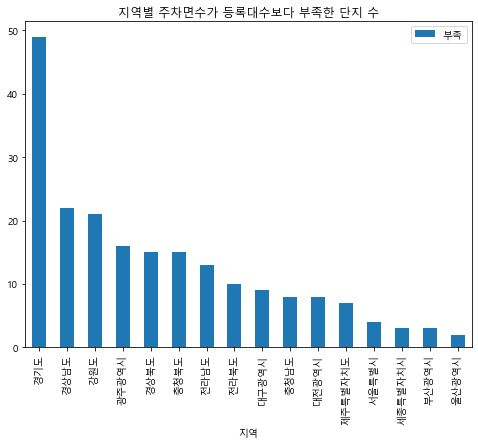

In [83]:
target_cnt_graph.plot(x="지역", y="부족", kind="bar",figsize=(8,6))
plt.title("지역별 주차면수가 등록대수보다 부족한 단지 수")
# 주차장 수가 부족한 곳이 많은 지역부터

## 등록차량수가 주차면수보다 많은 곳과 주차장확보율 비교 >> 서울걸로 확인해보기
- <주차장 확보율_서울> : https://data.seoul.go.kr/dataList/10357/S/2/datasetView.do
- <주택가 주차장 확보율_서울> : https://data.seoul.go.kr/dataList/254/S/2/datasetView.do

In [43]:
parking_gubun_total = pd.read_csv("parking_data/면적별_세대수_구분.csv")
parking_gubun_total.head()

,단지코드,총세대수,임대건물구분,지역,빈집,노선수,버스,area10,area20,area30,area40,area50,area60,area70,area80,area100,주차면수,등록차량수
0,C2515,545,아파트,경상남도,17.0,0.0,3.0,0,0,356,57,132,0,0,0,0,624.0,205.0
1,C1407,1216,아파트,대전광역시,13.0,1.0,1.0,0,0,390,702,124,0,0,0,0,1285.0,1064.0
2,C1945,755,아파트,경기도,6.0,1.0,3.0,0,0,240,0,515,0,0,0,0,734.0,730.0
3,C1470,696,아파트,전라북도,14.0,0.0,2.0,0,0,254,196,246,0,0,0,0,645.0,553.0
4,C1898,566,아파트,전라북도,9.0,0.0,6.0,0,0,271,209,86,0,0,0,0,517.0,415.0


In [45]:
parking_problem = parking_gubun_total.iloc[parking_gubun[parking_gubun["주차면수에 대한 등록차량수"]>1].index,:]

In [51]:
problem = parking_problem["지역"].value_counts()

In [52]:
parking_car = parking_rate_target["2019"].sort_values()

In [66]:
df_problem = pd.DataFrame({"주택주차장수가 적은 곳":problem})
df_problem.head()

,주택주차장수가 적은 곳
경기도,48
경상남도,22
강원도,21
광주광역시,16
충청북도,15


In [67]:
df_parking_rate = pd.DataFrame({"자동차등록대수 대비 주차장확보율":parking_car})
df_parking_rate

,자동차등록대수 대비 주차장확보율
제주특별자치도,66.5
전라남도,77.6
인천광역시,80.1
충청북도,84.1
경상북도,90.6
대구광역시,93.0
경상남도,95.1
전라북도,97.7
광주광역시,98.5
울산광역시,99.9


<AxesSubplot:>

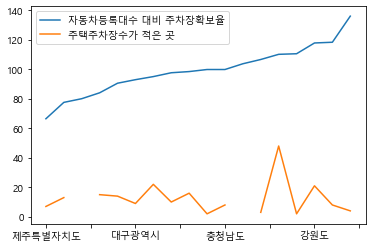

In [72]:
parking_graph = pd.concat([df_parking_rate,df_problem], axis=1)
parking_graph.plot() 
# 반대 그래프가 나와야 되는데 주택주차장수가 적은 곳에 규칙이 없고 굳이 따지자면 비슷한 경향을 보임
# 즉 주차장 확보율은 크지만 주택 주차장 수가 작은 곳이 많음

In [73]:
parking_graph.corr() #관계가 없음(있다고 하더라도 양의 관계)

,자동차등록대수 대비 주차장확보율,주택주차장수가 적은 곳
자동차등록대수 대비 주차장확보율,1.000000,0.016942
주택주차장수가 적은 곳,0.016942,1.000000


### 서울데이터로 한 것

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

In [4]:

seoul_total = pd.read_excel("parking_data/서울시전체주차장확보율.xlsx", index_col=[0,1], header=[0,1])
seoul_total = seoul_total.droplevel(0)
seoul_total.columns = [["2017","2017","2017","2018","2018","2018","2019","2019","2019","2020","2020","2020","2021","2021","2021"],
                      ["자동차수","주차면수","주차장확보율","자동차수","주차면수","주차장확보율","자동차수","주차면수","주차장확보율","자동차수","주차면수","주차장확보율","자동차수","주차면수","주차장확보율"]]
seoul_total.head()

C:\Users\gyeoa\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


2017                         2018                         2019  \
          자동차수       주차면수 주차장확보율       자동차수       주차면수 주차장확보율       자동차수   
소계   3116256.0  4053875.0  130.1  3124651.0  4129723.0  132.2  3124157.0   
종로구    50828.0    90099.0  177.3    50732.0    94485.0  186.2    50052.0   
중구     51540.0    99538.0  193.1    51813.0   108240.0  208.9    51736.0   
용산구    77458.0   112712.0  145.5    77515.0   113341.0  146.2    76521.0   
성동구   103116.0   123306.0  119.6   106094.0   121228.0  114.3   106263.0   

                            2020                         2021             \
          주차면수 주차장확보율       자동차수       주차면수 주차장확보율       자동차수       주차면수   
소계   4250682.0  136.1  3157353.0  4327614.0  137.1  3176736.0  4354516.0   
종로구    95350.0  190.5    50266.0    95048.0  189.1    50347.0    96350.0   
중구    107399.0  207.6    51128.0   107738.0  210.7    61159.0   108561.0   
용산구   113591.0  148.4    78995.0   116870.0  147.9    79740.0   110649.0   
성동구   133724.0  125.8   106156.0   133161.0  125.4   107564.0   134107.0   

            
    주차장확보율  
소계   137.0  
종로구  191.0  
중구   178.0  
용산구  139.0  
성동구  125.0

In [5]:
seoul_house = pd.read_excel("parking_data/서울시주택가주차장확보율.xlsx", index_col=[0,1], header=[0,1])
seoul_house = seoul_house.droplevel(0)
seoul_house.columns =  [["2017","2017","2017","2018","2018","2018","2019","2019","2019","2020","2020","2020","2021","2021","2021"],
                      ["자동차수","주차면수","주차장확보율","자동차수","주차면수","주차장확보율","자동차수","주차면수","주차장확보율","자동차수","주차면수","주차장확보율","자동차수","주차면수","주차장확보율"]]
seoul_house.head()
# 여기서 자동차 수는 자가용만

C:\Users\gyeoa\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


2017                         2018                         2019  \
          자동차수       주차면수 주차장확보율       자동차수       주차면수 주차장확보율       자동차수   
소계   2513827.0  2560988.0  101.9  2526699.0  2592908.0  102.6  2538890.0   
종로구    38819.0    32112.0   82.7    38959.0    32782.0   84.1    38643.0   
중구     38540.0    30353.0   78.8    38205.0    33102.0   86.6    38341.0   
용산구    66023.0    71685.0  108.6    66464.0    72580.0  109.2    65989.0   
성동구    81053.0    80954.0   99.9    83654.0    78863.0   94.3    82514.0   

                            2020                         2021             \
          주차면수 주차장확보율       자동차수       주차면수 주차장확보율       자동차수       주차면수   
소계   2614621.0  103.0  2581992.0  2676047.0  103.6  2609334.0  2720553.0   
종로구    35538.0   92.0    38953.0    35562.0   91.3    38996.0    35773.0   
중구     33592.0   87.6    38552.0    34415.0   89.3    47592.0    33851.0   
용산구    72784.0  110.3    68904.0    74463.0  108.1    69749.0    69593.0   
성동구    76731.0   93.0    82602.0    89340.0  108.2    82640.0    89181.0   

            
    주차장확보율  
소계   104.3  
종로구   91.7  
중구    71.1  
용산구   99.8  
성동구  107.9

In [7]:
total_parking_seoul = seoul_total.iloc[0]
total_seoul_house = seoul_house.iloc[0]

type(total_seoul_house)

pandas.core.series.Series

In [8]:
parking_seoul = pd.DataFrame({"전체주차장":total_parking_seoul, "주택주차장":total_seoul_house}).T
parking_seoul

2017                         2018                         2019  \
            자동차수       주차면수 주차장확보율       자동차수       주차면수 주차장확보율       자동차수   
전체주차장  3116256.0  4053875.0  130.1  3124651.0  4129723.0  132.2  3124157.0   
주택주차장  2513827.0  2560988.0  101.9  2526699.0  2592908.0  102.6  2538890.0   

                              2020                         2021             \
            주차면수 주차장확보율       자동차수       주차면수 주차장확보율       자동차수       주차면수   
전체주차장  4250682.0  136.1  3157353.0  4327614.0  137.1  3176736.0  4354516.0   
주택주차장  2614621.0  103.0  2581992.0  2676047.0  103.6  2609334.0  2720553.0   

              
      주차장확보율  
전체주차장  137.0  
주택주차장  104.3

In [118]:
parking_num_rate = parking_seoul.iloc[:,[1,4,7,10,13]].T
parking_num_rate["비율"] = parking_num_rate["주택주차장"]/parking_num_rate["전체주차장"]
parking_num_rate

,,전체주차장,주택주차장,비율
2017,주차면수,4053875.0,2560988.0,0.631738
2018,주차면수,4129723.0,2592908.0,0.627865
2019,주차면수,4250682.0,2614621.0,0.615106
2020,주차면수,4327614.0,2676047.0,0.618365
2021,주차면수,4354516.0,2720553.0,0.624766


In [119]:
parking_num_rate = parking_num_rate.droplevel(1)
parking_num_rate

,전체주차장,주택주차장,비율
2017,4053875.0,2560988.0,0.631738
2018,4129723.0,2592908.0,0.627865
2019,4250682.0,2614621.0,0.615106
2020,4327614.0,2676047.0,0.618365
2021,4354516.0,2720553.0,0.624766


In [153]:
parking_num_rate1 = parking_num_rate[["전체주차장","주택주차장"]]
parking_num_rate2 = parking_num_rate[["비율"]]

In [150]:
parking_num_rate1 = parking_num_rate1.reset_index()
parking_num_rate1

,index,전체주차장,주택주차장
0,2017,4053875.0,2560988.0
1,2018,4129723.0,2592908.0
2,2019,4250682.0,2614621.0
3,2020,4327614.0,2676047.0
4,2021,4354516.0,2720553.0


In [147]:
parking_num_rate1.T

,2017,2018,2019,2020,2021
전체주차장,4053875.0,4129723.0,4250682.0,4327614.0,4354516.0
주택주차장,2560988.0,2592908.0,2614621.0,2676047.0,2720553.0


In [157]:
parking_num_rate3 = parking_num_rate.reset_index()
parking_num_rate3

,index,전체주차장,주택주차장,비율
0,2017,4053875.0,2560988.0,0.631738
1,2018,4129723.0,2592908.0,0.627865
2,2019,4250682.0,2614621.0,0.615106
3,2020,4327614.0,2676047.0,0.618365
4,2021,4354516.0,2720553.0,0.624766


In [175]:
parking_num_rate["비율"]=parking_num_rate["비율"]*3000000

<AxesSubplot:>

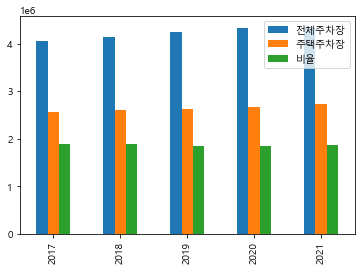

In [176]:
parking_num_rate.plot(kind="bar")

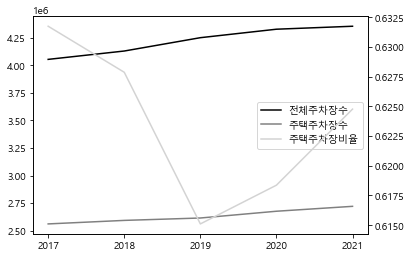

In [247]:
ax = plt.subplot()
line1 = ax.plot(parking_num_rate1.index, parking_num_rate1["전체주차장"], color="black", label="전체주차장수")
line2 = ax.plot(parking_num_rate1.index, parking_num_rate1["주택주차장"], color="gray", label="주택주차장수")
ax2 = ax.twinx()
line3 = ax2.plot(parking_num_rate2.index, parking_num_rate2["비율"], color="lightgray", label="주택주차장비율")
lines = line1+line2+line3
labels = [l.get_label() for l in lines]
ax.legend(lines, labels)

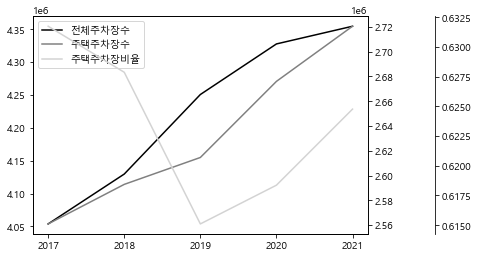

In [245]:
ax = plt.subplot()
line1 = ax.plot(parking_num_rate1.index, parking_num_rate1["전체주차장"], color="black", label="전체주차장수")
ax1 = ax.twinx()
line2 = ax1.plot(parking_num_rate1.index, parking_num_rate1["주택주차장"], color="gray", label="주택주차장수")
ax2 = ax.twinx()
line3 = ax2.plot(parking_num_rate2.index, parking_num_rate2["비율"], color="lightgray", label="주택주차장비율")
ax2.spines.right.set_position(("axes",1.2))
lines = line1+line2+line3
labels = [l.get_label() for l in lines]
ax.legend(lines, labels)

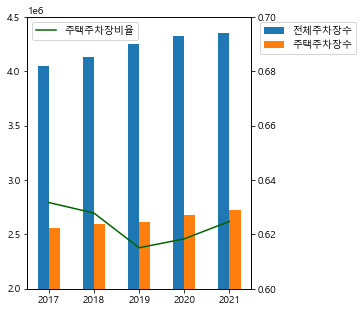

In [288]:
fig = plt.figure(figsize=(4,5))
ax = plt.subplot()
xtick_label_position = list(range(len(parking_num_rate1.index)))
xtick = [0.25, 1.25, 2.25, 3.25, 4.25]
g1 = plt.bar(xtick_label_position, parking_num_rate1["전체주차장"], width=0.25, label="전체주차장수")
g2 = plt.bar(xtick, parking_num_rate1["주택주차장"], width=0.25, label="주택주차장수")
plt.xticks([0.125, 1.125, 2.125, 3.125, 4.125], labels = list(parking_num_rate1.index))
plt.legend(bbox_to_anchor=(1.02, 1))
plt.ylim(2000000,4500000)

ax1 = ax.twinx()
g3 = ax1.plot([0.125, 1.125, 2.125, 3.125, 4.125], parking_num_rate2["비율"], color="darkgreen", label="주택주차장비율")
plt.ylim(0.6,0.7)

ax1.legend(loc="upper left")

In [251]:
parking_num_rate3[parking_num_rate3.columns[1:]].corr()

,전체주차장,주택주차장,비율
전체주차장,1.000000,0.945854,-0.685651
주택주차장,0.945854,1.000000,-0.412277
비율,-0.685651,-0.412277,1.000000


In [386]:
parking_num_rate1["전체주차장증가비율"]=0
parking_num_rate1["주택주차장증가비율"]=0
for i in range(int(len(parking_num_rate1))-1):
    parking_num_rate1.iloc[i+1,2]= (parking_num_rate1.iloc[i+1,0]-parking_num_rate1.iloc[i,0])/parking_num_rate1.iloc[i,0]
    parking_num_rate1.iloc[i+1,3]= (parking_num_rate1.iloc[i+1,1]-parking_num_rate1.iloc[i,1])/parking_num_rate1.iloc[i,1]

parking_num_rate1

,전체주차장,주택주차장,전체주차장증가비율,주택주차장증가비율
2017,4053875.0,2560988.0,0.000000,0.000000
2018,4129723.0,2592908.0,0.018710,0.012464
2019,4250682.0,2614621.0,0.029290,0.008374
2020,4327614.0,2676047.0,0.018099,0.023493
2021,4354516.0,2720553.0,0.006216,0.016631


In [391]:
parking_num_rate1["전체주차장증가량"]=0
parking_num_rate1["주택주차장증가량"]=0
for i in range(int(len(parking_num_rate1))-1):
    parking_num_rate1.iloc[i+1,4]= (parking_num_rate1.iloc[i+1,0]-parking_num_rate1.iloc[i,0])
    parking_num_rate1.iloc[i+1,5]= (parking_num_rate1.iloc[i+1,1]-parking_num_rate1.iloc[i,1])

parking_num_rate1

,전체주차장,주택주차장,전체주차장증가비율,주택주차장증가비율,전체주차장증가량,주택주차장증가량
2017,4053875.0,2560988.0,0.000000,0.000000,0,0
2018,4129723.0,2592908.0,0.018710,0.012464,75848,31920
2019,4250682.0,2614621.0,0.029290,0.008374,120959,21713
2020,4327614.0,2676047.0,0.018099,0.023493,76932,61426
2021,4354516.0,2720553.0,0.006216,0.016631,26902,44506


<AxesSubplot:>

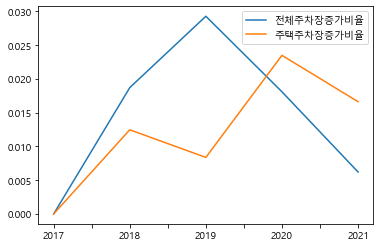

In [394]:
parking_num_rate1.iloc[:,2:4].plot()

<AxesSubplot:>

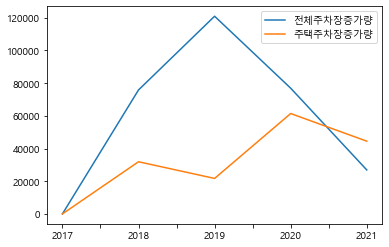

In [395]:
parking_num_rate1.iloc[:,-2:].plot()

In [404]:
parking_seoul_car_increase = parking_seoul.iloc[:,[0,3,6,9,12]].T
parking_seoul_car_increase = parking_seoul_car_increase.droplevel(1)
parking_seoul_car_increase["전체자동차증가량"]=0
parking_seoul_car_increase["주택자동차증가량"]=0
for i in range(int(len(parking_seoul_car_increase))-1):
    parking_seoul_car_increase.iloc[i+1,2]= (parking_seoul_car_increase.iloc[i+1,0]-parking_seoul_car_increase.iloc[i,0])
    parking_seoul_car_increase.iloc[i+1,3]= (parking_seoul_car_increase.iloc[i+1,1]-parking_seoul_car_increase.iloc[i,1])

parking_seoul_car_increase

,전체주차장,주택주차장,전체자동차증가량,주택자동차증가량
2017,3116256.0,2513827.0,0,0
2018,3124651.0,2526699.0,8395,12872
2019,3124157.0,2538890.0,-494,12191
2020,3157353.0,2581992.0,33196,43102
2021,3176736.0,2609334.0,19383,27342


In [405]:
parking_seoul_car_increase["전체자동차증가비율"]=0
parking_seoul_car_increase["주택자동차증가비율"]=0
for i in range(int(len(parking_seoul_car_increase))-1):
    parking_seoul_car_increase.iloc[i+1,4]= (parking_seoul_car_increase.iloc[i+1,0]-parking_seoul_car_increase.iloc[i,0])/parking_seoul_car_increase.iloc[i,0]
    parking_seoul_car_increase.iloc[i+1,5]= (parking_seoul_car_increase.iloc[i+1,1]-parking_seoul_car_increase.iloc[i,1])/parking_seoul_car_increase.iloc[i,1]

parking_seoul_car_increase

,전체주차장,주택주차장,전체자동차증가량,주택자동차증가량,전체자동차증가비율,주택자동차증가비율
2017,3116256.0,2513827.0,0,0,0.000000,0.000000
2018,3124651.0,2526699.0,8395,12872,0.002694,0.005120
2019,3124157.0,2538890.0,-494,12191,-0.000158,0.004825
2020,3157353.0,2581992.0,33196,43102,0.010626,0.016977
2021,3176736.0,2609334.0,19383,27342,0.006139,0.010589


In [437]:
# 증가량이 -인 것은 +로 처리
parking_seoul_car_increase.iloc[2,2]=0
parking_seoul_car_increase.iloc[2,4]=0.000158
parking_seoul_car_increase

,전체주차장,주택주차장,전체자동차증가량,주택자동차증가량,전체자동차증가비율,주택자동차증가비율
2017,3116256.0,2513827.0,0,0,0.000000,0.000000
2018,3124651.0,2526699.0,8395,12872,0.002694,0.005120
2019,3124157.0,2538890.0,0,12191,0.000158,0.004825
2020,3157353.0,2581992.0,33196,43102,0.010626,0.016977
2021,3176736.0,2609334.0,19383,27342,0.006139,0.010589


In [406]:
parking_num_rate1

,전체주차장,주택주차장,전체주차장증가비율,주택주차장증가비율,전체주차장증가량,주택주차장증가량
2017,4053875.0,2560988.0,0.000000,0.000000,0,0
2018,4129723.0,2592908.0,0.018710,0.012464,75848,31920
2019,4250682.0,2614621.0,0.029290,0.008374,120959,21713
2020,4327614.0,2676047.0,0.018099,0.023493,76932,61426
2021,4354516.0,2720553.0,0.006216,0.016631,26902,44506


<AxesSubplot:>

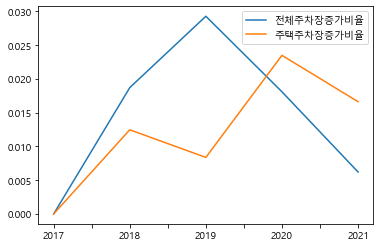

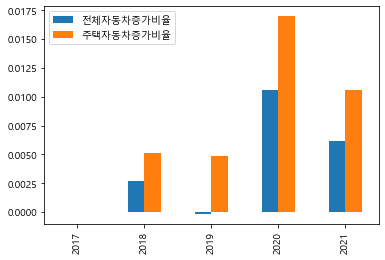

In [409]:
parking_num_rate1.iloc[:,2:4].plot()
parking_seoul_car_increase.iloc[:,-2:].plot(kind="bar")

In [434]:
increase_different = pd.DataFrame({"자동차증가량대비_주차장증가량_전체":parking_num_rate1["전체주차장증가량"]/parking_seoul_car_increase["전체자동차증가량"],
              "자동차증가량대비_주차장증가량_주택":parking_num_rate1["주택주차장증가량"]/parking_seoul_car_increase["주택자동차증가량"]})
increase_different=increase_different.fillna(0)
increase_different

,자동차증가량대비_주차장증가량_전체,자동차증가량대비_주차장증가량_주택
2017,0.000000,0.000000
2018,9.034902,2.479801
2019,inf,1.781068
2020,2.317508,1.425131
2021,1.387917,1.627752


<AxesSubplot:>

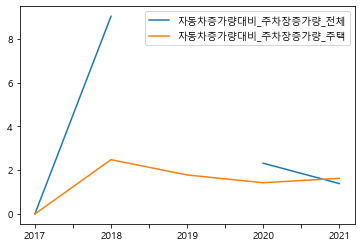

In [435]:
increase_different.plot()
# 전체적인 주차장수는 자동차수가 증가한 것에 비해 많은 양이 늘었지만
# 주택의 경우 자동차가 증가한 것에 비해 주차수가 많이 늘지 않았다

In [439]:
increase_different = pd.DataFrame({"자동차증가량대비_주차장증가비율_전체":parking_num_rate1["전체주차장증가비율"]/parking_seoul_car_increase["전체자동차증가비율"],
              "자동차증가량대비_주차장증가비율_주택":parking_num_rate1["주택주차장증가비율"]/parking_seoul_car_increase["주택자동차증가비율"]})
increase_different=increase_different.fillna(0)
increase_different

,자동차증가량대비_주차장증가비율_전체,자동차증가량대비_주차장증가비율_주택
2017,0.000000,0.000000
2018,6.945223,2.434135
2019,185.378848,1.735589
2020,1.703317,1.383853
2021,1.012601,1.570542


In [445]:
increase_different.iloc[2,0]=20
increase_different

,자동차증가량대비_주차장증가비율_전체,자동차증가량대비_주차장증가비율_주택
2017,0.000000,0.000000
2018,6.945223,2.434135
2019,20.000000,1.735589
2020,1.703317,1.383853
2021,1.012601,1.570542


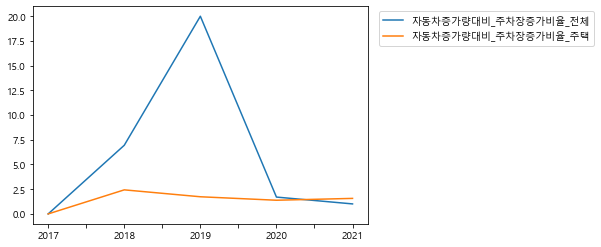

In [449]:
increase_different.plot()
plt.legend(bbox_to_anchor=(1.02, 1))
# 전체적인 주차장수는 자동차수가 증가한 것에 비해 많은 양이 늘었지만
# 주택의 경우 자동차가 증가한 것에 비해 주차수가 많이 늘지 않았다
# 주택의 경우 2021년을 제외하고 전체적인 주차장 증가비율에 비해 그 비율이 적다

In [12]:
parking_seoul_graph = parking_seoul.iloc[:, [2,5,8,11,14]].droplevel(1, axis=1).T

parking_seoul_graph.columns = ["전체주차장확보율", "주택주차장확보율"]
parking_seoul_graph["전체주차확보율_대비_주택주차확보율"] = parking_seoul_graph["주택주차장확보율"]/parking_seoul_graph["전체주차장확보율"]*100
parking_seoul_graph

,전체주차장확보율,주택주차장확보율,전체주차확보율_대비_주택주차확보율
2017,130.1,101.9,78.324366
2018,132.2,102.6,77.609682
2019,136.1,103.0,75.679647
2020,137.1,103.6,75.565281
2021,137.0,104.3,76.131387


In [13]:
parking_seoul_graph["전체주차확보율_대비_주택주차확보율"] = parking_seoul_graph["전체주차확보율_대비_주택주차확보율"]*1.2

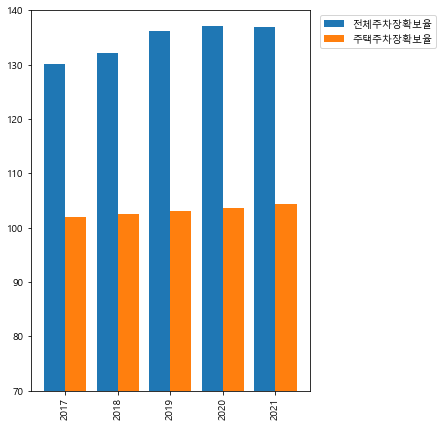

In [14]:
parking_seoul_graph = parking_seoul_graph[["전체주차장확보율", "주택주차장확보율"]]
parking_seoul_graph.plot(kind="bar", figsize=(5,7), width=0.8)
plt.ylim(70,140)
plt.legend(bbox_to_anchor=(1.02, 1))

In [32]:
print(np.sqrt(277222.2812), np.sqrt(276797.8125))

526.5190226383089 526.115778607713


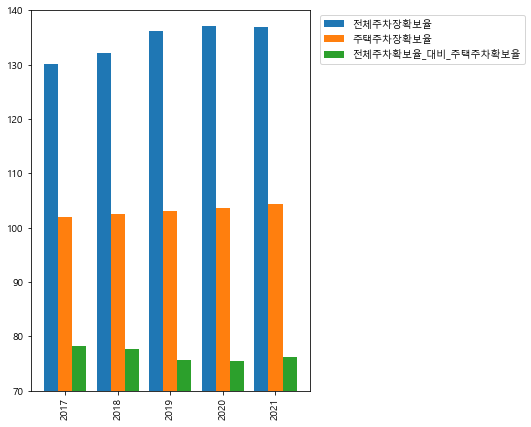

In [87]:
parking_seoul_graph.plot(kind="bar", figsize=(5,7), width=0.8)
plt.ylim(70,140)
plt.legend(bbox_to_anchor=(1.02, 1))

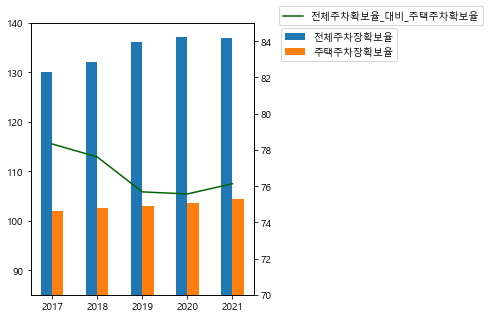

In [298]:
fig = plt.figure(figsize=(4,5))
ax = plt.subplot()
xtick_label_position = list(range(len(parking_seoul_graph.index)))
xtick = [0.25, 1.25, 2.25, 3.25, 4.25]
g1 = plt.bar(xtick_label_position, parking_seoul_graph["전체주차장확보율"], width=0.25, label="전체주차장확보율")
g2 = plt.bar(xtick, parking_seoul_graph["주택주차장확보율"], width=0.25, label="주택주차장확보율")
plt.xticks([0.125, 1.125, 2.125, 3.125, 4.125], labels = list(parking_num_rate1.index))
plt.legend(bbox_to_anchor=(1.1, 1))
plt.ylim(85,140)

ax1 = ax.twinx()
g3 = ax1.plot([0.125, 1.125, 2.125, 3.125, 4.125], parking_seoul_graph["전체주차확보율_대비_주택주차확보율"], color="darkgreen", label="전체주차확보율_대비_주택주차확보율")
plt.ylim(70,85)

plt.legend(bbox_to_anchor=(2.05, 1.08))

In [248]:
parking_seoul_graph.corr()

,전체주차장확보율,주택주차장확보율,전체주차확보율_대비_주택주차확보율
전체주차장확보율,1.000000,0.905487,-0.972344
주택주차장확보율,0.905487,1.000000,-0.781411
전체주차확보율_대비_주택주차확보율,-0.972344,-0.781411,1.000000


## 지역별 세대당 자동차 등록대수, 주차장 확보율 그래프 합치기

In [292]:
### 지역별 세대당 자동차 등록대수

house_car = pd.read_csv("parking_data/세대당자동차등록대수.csv", encoding="euc-kr")
house_car.head()

,통계연도,시도명,시군구명,세대당 자동차등록(대),주민등록세대수(명),자동차등록대수(대)
0,2017,강원도,강릉시,1.09,95963,104693
1,2017,강원도,고성군,0.91,15519,14076
2,2017,강원도,동해시,1.07,40730,43647
3,2017,강원도,삼척시,0.91,33863,30889
4,2017,강원도,속초시,0.97,37772,36601


In [295]:
house_car2019 = house_car[house_car["통계연도"]==2019]
house_car2019.head()

,통계연도,시도명,시군구명,세대당 자동차등록(대),주민등록세대수(명),자동차등록대수(대)
520,2019,강원도,강릉시,1.10,99086,109166
521,2019,강원도,고성군,0.98,14445,14217
522,2019,강원도,동해시,1.10,41141,45324
523,2019,강원도,삼척시,0.96,34082,32662
524,2019,강원도,속초시,0.98,38689,38004


In [309]:
house_car_target2019 = house_car2019.groupby("시도명").sum()[["자동차등록대수(대)"]]
house_car_target2019

,자동차등록대수(대)
시도명,
강원도,782700
경기도,8002509
경상남도,2284782
경상북도,1712687
광주광역시,676281
대구광역시,1190154
대전광역시,673899
부산광역시,1395183
서울특별시,3124157


In [311]:
car_target2019_house = house_car2019.groupby("시도명").mean()[["세대당 자동차등록(대)"]]
car_target2019_house

,세대당 자동차등록(대)
시도명,
강원도,1.080000
경기도,1.046250
경상남도,1.150435
경상북도,1.149600
광주광역시,1.056000
대구광역시,1.146250
대전광역시,1.062000
부산광역시,0.968750
서울특별시,0.720400


In [306]:
parking_rate_target2019 = parking_rate_target[["2019"]]
parking_rate_target2019

행정구역별,2019
전국,103.8
서울특별시,136.1
부산광역시,110.6
대구광역시,93.0
인천광역시,80.1
광주광역시,98.5
대전광역시,118.4
울산광역시,99.9
세종특별자치시,106.7
경기도,110.2


In [307]:
parking_all_num = parking_rate.iloc[:,[1,4,7,10,13,16]]
parking_all_num_target2019 = parking_all_num.droplevel(1, axis=1)[["2019"]]
parking_all_num_target2019.head()

행정구역별,2019
전국,24584466.0
서울특별시,4250682.0
부산광역시,1542526.0
대구광역시,1107117.0
인천광역시,1310332.0


In [316]:
parking_rate_target2019.columns=["2019주차장확보율"]
parking_all_num_target2019.columns=["2019전체주차장수"]
house_car_target2019.columns=["2019전체자동차등록대수"]
car_target2019_house.columns=["2019세대당자동차등록대수"]

In [317]:
total_target = pd.concat([parking_rate_target2019, car_target2019_house, parking_all_num_target2019, house_car_target2019], axis=1)

In [319]:
total_target_graph = total_target.dropna()
total_target_graph

,2019주차장확보율,2019세대당자동차등록대수,2019전체주차장수,2019전체자동차등록대수
서울특별시,136.1,0.720400,4250682.0,3124157.0
부산광역시,110.6,0.968750,1542526.0,1395183.0
대구광역시,93.0,1.146250,1107117.0,1190154.0
인천광역시,80.1,1.409000,1310332.0,1635323.0
광주광역시,98.5,1.056000,665964.0,676281.0
대전광역시,118.4,1.062000,798103.0,673899.0
울산광역시,99.9,1.202000,565211.0,565639.0
경기도,110.2,1.046250,6354036.0,8002509.0
강원도,117.9,1.080000,922739.0,782700.0
충청북도,84.1,1.148667,704207.0,1256050.0


In [321]:
total_target_graph1=total_target_graph.iloc[:, [0,1]]
total_target_graph1

,2019주차장확보율,2019세대당자동차등록대수
서울특별시,136.1,0.720400
부산광역시,110.6,0.968750
대구광역시,93.0,1.146250
인천광역시,80.1,1.409000
광주광역시,98.5,1.056000
대전광역시,118.4,1.062000
울산광역시,99.9,1.202000
경기도,110.2,1.046250
강원도,117.9,1.080000
충청북도,84.1,1.148667


In [323]:
total_target_graph1["2019주차장확보율"] = total_target_graph1["2019주차장확보율"]/100
total_target_graph1

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_12600\2900589343.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_target_graph1["2019주차장확보율"] = total_target_graph1["2019주차장확보율"]/100


,2019주차장확보율,2019세대당자동차등록대수
서울특별시,1.361,0.720400
부산광역시,1.106,0.968750
대구광역시,0.930,1.146250
인천광역시,0.801,1.409000
광주광역시,0.985,1.056000
대전광역시,1.184,1.062000
울산광역시,0.999,1.202000
경기도,1.102,1.046250
강원도,1.179,1.080000
충청북도,0.841,1.148667


<AxesSubplot:>

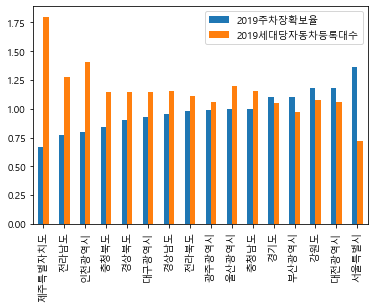

In [325]:
total_target_graph1.sort_values(by="2019주차장확보율").plot(kind="bar")

# 반대의 그래프
# 세대당 자동차등록대수가 많은 곳이 확보율이 오히려 적은 경향을 보이고 있음

<AxesSubplot:>

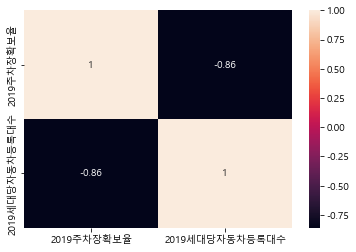

In [371]:
sns.heatmap(total_target_graph1.corr(), annot=True)

In [330]:
total_target_graph2 = total_target_graph.iloc[:, [2,3]]
total_target_graph2

,2019전체주차장수,2019전체자동차등록대수
서울특별시,4250682.0,3124157.0
부산광역시,1542526.0,1395183.0
대구광역시,1107117.0,1190154.0
인천광역시,1310332.0,1635323.0
광주광역시,665964.0,676281.0
대전광역시,798103.0,673899.0
울산광역시,565211.0,565639.0
경기도,6354036.0,8002509.0
강원도,922739.0,782700.0
충청북도,704207.0,1256050.0


<AxesSubplot:>

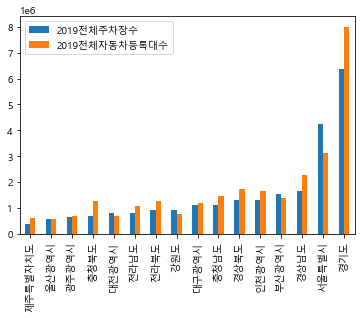

In [331]:
total_target_graph2.sort_values(by="2019전체주차장수").plot(kind="bar")
# 얜 당연히 자동차 등록대수가 많은 곳이 주차장 수가 많을 수 밖에 
# 하지만 그 비율이 맞지 않다는 것

In [86]:
pre_train.groupby("지역").mean().corr()

,총세대수,전용면적,전용면적별세대수,빈집,노선수,버스,주차면수,등록차량수
총세대수,1.000000,0.651085,0.296718,-0.125398,0.699535,-0.226420,0.573383,0.456291
전용면적,0.651085,1.000000,0.695906,-0.002706,0.296366,-0.470917,0.857318,0.845115
전용면적별세대수,0.296718,0.695906,1.000000,0.324935,-0.035121,-0.523307,0.838744,0.853849
빈집,-0.125398,-0.002706,0.324935,1.000000,0.059817,-0.304707,0.053262,-0.017854
노선수,0.699535,0.296366,-0.035121,0.059817,1.000000,0.167540,0.156855,0.005337
버스,-0.226420,-0.470917,-0.523307,-0.304707,0.167540,1.000000,-0.291794,-0.348811
주차면수,0.573383,0.857318,0.838744,0.053262,0.156855,-0.291794,1.000000,0.972779
등록차량수,0.456291,0.845115,0.853849,-0.017854,0.005337,-0.348811,0.972779,1.000000
